In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import math
import warnings
from scipy.optimize import curve_fit
from scipy import integrate
import natural_cubic_spline_stack_overflow as ncs
import dynamic_stock_model as dsm 
warnings.simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")
from math import *


## Lifetime modelling

EPISCOPE/TABULA allows us to do approximations of average lifetimes for each dwelling type. 

In [3]:
def Average(lst): 
    return sum(lst) / len(lst) 

In [4]:
TYP = ['AB','MFH','SFH','TH']
LT = [46,61,47,64]
DEV = [25,25,25,25]

print(Average(LT))

DSM = pd.read_csv("Model/DSM_TOT.csv")
DSM = DSM.set_index('DSM')
DSM_AB = pd.read_csv("Model/DSM_AB.csv")
DSM_AB = DSM_AB.set_index('DSM AB')
DSM_MFH = pd.read_csv("Model/DSM_MFH.csv")
DSM_MFH = DSM_MFH.set_index('DSM MFH')
DSM_SFH = pd.read_csv("Model/DSM_SFH.csv")
DSM_SFH = DSM_SFH.set_index('DSM SFH')
DSM_TH = pd.read_csv("Model/DSM_TH.csv")
DSM_TH = DSM_TH.set_index('DSM TH')
display(DSM_TH.loc[1980:2020])


54.5


,Population,Stock,PpD,Stock change,Inflow,Outflow
DSM TH,,,,,,
1980,46787100.0,9.197606e+06,2.493228,NaN,NaN,NaN
1981,46820902.5,9.183430e+06,2.483273,NaN,NaN,NaN
1982,46777168.5,9.164866e+06,2.474012,NaN,NaN,NaN
1983,46813846.5,9.142037e+06,2.465403,NaN,NaN,NaN
1984,46912222.0,9.115069e+06,2.457403,NaN,NaN,NaN
1985,47057179.5,9.084086e+06,2.449975,NaN,NaN,NaN
1986,47187821.5,9.049210e+06,2.443080,NaN,NaN,NaN
1987,47300209.5,9.010561e+06,2.436684,NaN,NaN,NaN
1988,47412171.0,8.968257e+06,2.430752,NaN,NaN,NaN


In [5]:
def logistic_stock(x:np.ndarray,ti:float,tau:float,C0:float,C1:float) -> np.ndarray:
    """
    General logistic function.
    Arguments:
    - x: np.ndarray of observation points (time)
    - ti: inflection time
    - tau: transition time coefficient
    - C0: start value
    - C1: end value
    Returns:
    - np.ndarray with len(x) number of points
    """
    return (C1 - C0)/(1 + np.exp(-(x - ti) / tau)) + C0  

,Population,Stock,PpD,Stock change,Inflow,Outflow
DSM,,,,,,
1600,3.776934e+06,8.023560e+05,4.707304,NaN,NaN,NaN
1601,3.781226e+06,8.032679e+05,4.707304,NaN,NaN,NaN
1602,3.785591e+06,8.041951e+05,4.707304,NaN,NaN,NaN
1603,3.790029e+06,8.051378e+05,4.707304,NaN,NaN,NaN
1604,3.794541e+06,8.060963e+05,4.707304,NaN,NaN,NaN
...,...,...,...,...,...,...
2046,6.034675e+07,2.558567e+07,2.358615,NaN,NaN,NaN
2047,6.046516e+07,2.563646e+07,2.358561,NaN,NaN,NaN
2048,6.058207e+07,2.568656e+07,2.358512,NaN,NaN,NaN


Input in year 2022:  426771.4120615572
Output in year 2022:  355415.1227067838
Input in year 2022:  499526.49762182526
Output in year 2022:  404900.9918431258
I is:  451
O is:  451


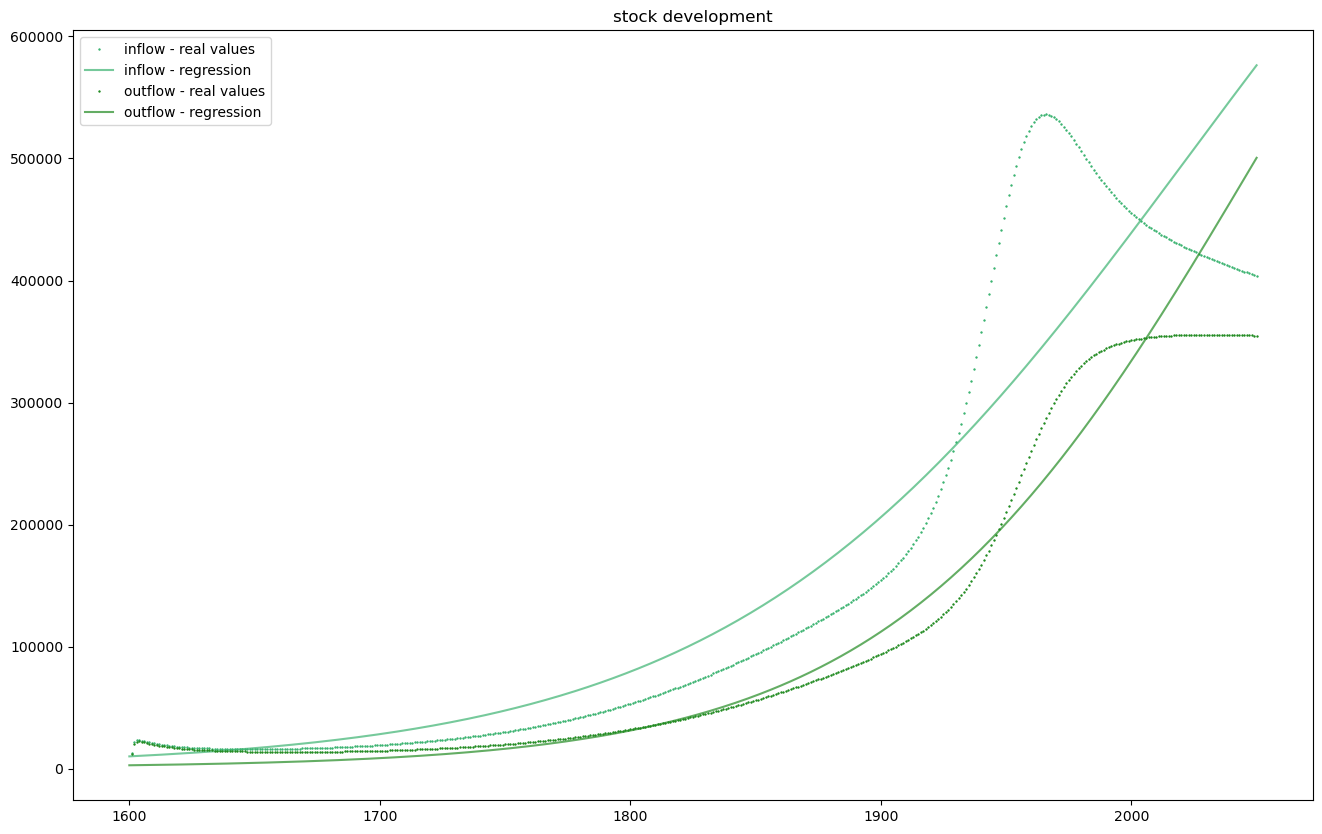

,Population,Stock,PpD,Stock change,Inflow,Outflow
DSM,,,,,,
1600,3.776934e+06,8.023560e+05,4.707304,NaN,NaN,NaN
1601,3.781226e+06,8.032679e+05,4.707304,NaN,12871.110110,11959.244884
1602,3.785591e+06,8.041951e+05,4.707304,NaN,21684.824095,20757.653749
1603,3.790029e+06,8.051378e+05,4.707304,NaN,23294.088199,22351.357971
1604,3.794541e+06,8.060963e+05,4.707304,NaN,23426.985318,22468.436278
...,...,...,...,...,...,...
2046,6.034675e+07,2.558567e+07,2.358615,NaN,406621.634209,355157.419224
2047,6.046516e+07,2.563646e+07,2.358561,NaN,405865.739545,355083.749573
2048,6.058207e+07,2.568656e+07,2.358512,NaN,405113.787980,355005.633063


In [6]:
lifetime = {
    'Type': 'LogNormal', # LogNormal ; FoldedNormal
    'Mean': np.array([125]), 
    'StdDev': np.array([35])
}

flow = dsm.DynamicStockModel(t=DSM.index,name="total dwelling stock",s=np.array(DSM['Stock']),lt=lifetime)

S_C, O_C, I = flow.compute_stock_driven_model()
O = flow.compute_outflow_total()
DS = flow.compute_stock_change()

#display(I)
#display(O)

DSM_model = DSM.copy(deep=True)
#DSM_model = DSM.set_index('Unnamed: 0')
DSM_model.index.Name = None
display(DSM_model)

inputs = DSM.index
outputs = DSM["Stock"]
pred_inputs = DSM_model.index

popt, pcov = curve_fit(logistic_stock, DSM.index, O, bounds = ([min(inputs), 0, 10**3, 10**6], [max(inputs), 10**5, 10**6, 10**8]))
O_model = logistic_stock(DSM_model.index, *popt)

popt, pcov = curve_fit(logistic_stock, DSM.index, I, bounds = ([min(inputs), 0, 10**3, 10**6], [max(inputs), 10**5, 10**6, 10**8]))
I_model = logistic_stock(DSM_model.index, *popt)

print('Input in year 2022: ', I[2022-1600])
print('Output in year 2022: ', O[2022-1600])
print('Input in year 2022: ', I_model[2022-1600])
print('Output in year 2022: ', O_model[2022-1600])
print('I is: ', len(I))
print('O is: ', len(O))

plt.figure(figsize=(16,10))
#plt.plot(year, stock, 'x', color = 'red', markersize = 4, label = f'stock')
plt.plot(DSM_model.index[1:], I[1:], '+', color = 'mediumseagreen', markersize = 2, label = f'inflow - real values')
plt.plot(DSM_model.index, I_model, color = 'mediumseagreen', markersize = 1, label = f'inflow - regression', alpha=0.7)
plt.plot(DSM_model.index[1:], O[1:], '+', color = 'forestgreen', markersize = 2, label = f'outflow - real values')
plt.plot(DSM_model.index, O_model, color = 'forestgreen', markersize = 1, label = f'outflow - regression', alpha=0.7)
plt.title('stock development')
plt.legend()
plt.show()

DSM_model['Outflow'][1:] = O[1:]
DSM_model['Inflow'][1:] = I[1:]

display(DSM_model)

Input in year 1970:  283250.9353443275
Input modelle in year 1970:  278509.0821266448
Output in year 1970:  53879.79690600978
Input in year 2022:  181107.69381557137
Input modelled in year 2022:  181804.88408932742
Output in year 2022:  109751.40446079607


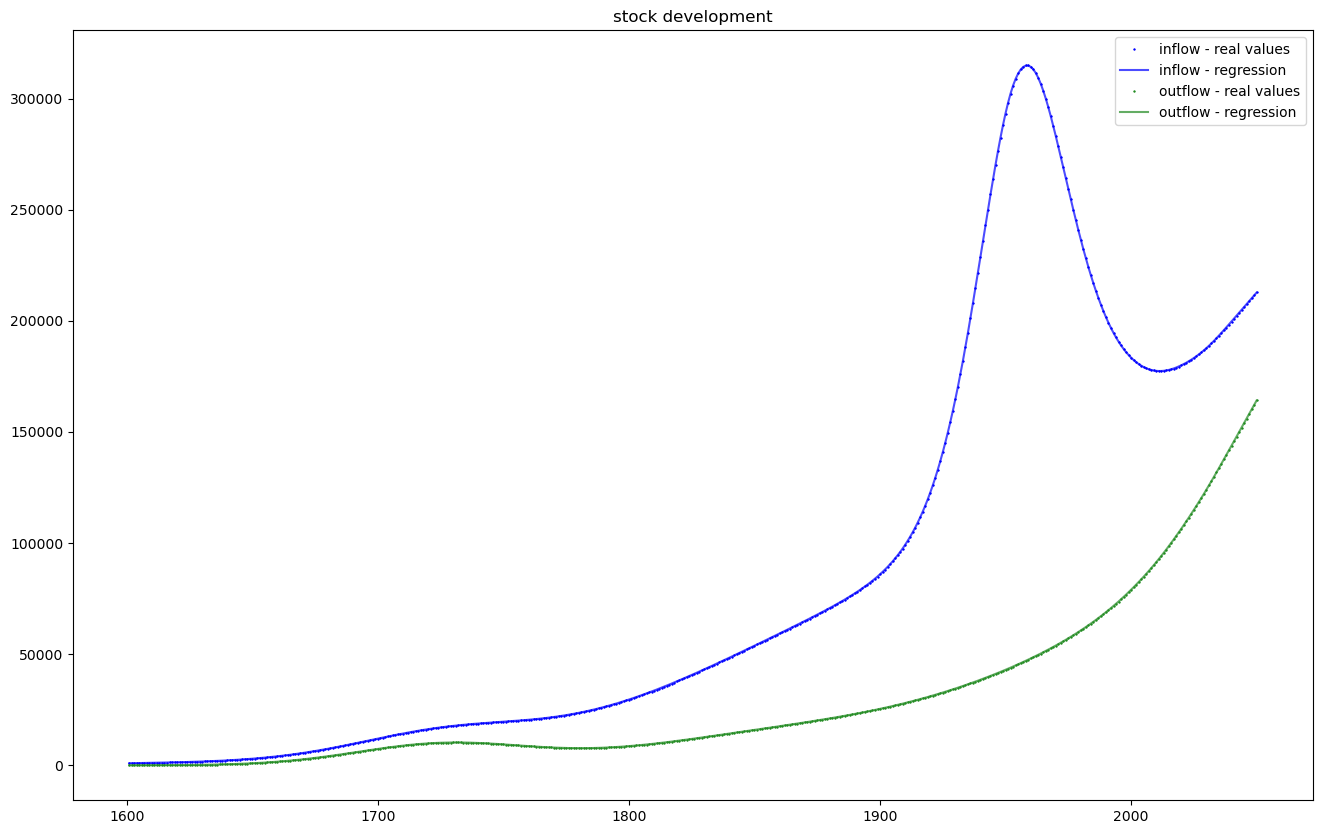

<Figure size 640x480 with 0 Axes>

In [26]:
def stock_driven_flows(lt_mean,lt_dev,dystomod,nm="dwelling stock"):
    lifetime = {
    'Type': 'Normal', # LogNormal ; FoldedNormal ; #Normal
    'Mean': np.array([lt_mean]), 
    'StdDev': np.array([lt_dev])
    }
    flow = dsm.DynamicStockModel(t=dystomod.index,name=nm,s=np.array(dystomod['Stock']),lt=lifetime)
    S_C, O_C, I = flow.compute_stock_driven_model()
    O = flow.compute_outflow_total()
    DS = flow.compute_stock_change()
    #display(I)
    #display(O)
    DSM_model = dystomod.copy(deep=True)
    #DSM_model = DSM.set_index('Unnamed: 0')
    DSM_model.index.name = None
    #display(DSM_model)
    
    ### If there are negative values ###
    I=np.array(I)
    O=np.array(O)
    I_copy=I.copy()
    I[I<0]=0
    diff=I-I_copy
    O=O+diff
    # difference = np.abs(I -np.max(0,I))
    # I = I.apply(lambda x: max(0, x))
    # O = O + difference
    
    inputs = dystomod.index
    outputs = dystomod["Stock"]
    pred_inputs = DSM_model.index
    inputs = np.array(inputs)
    pred_inputs=np.array(pred_inputs)
    outputs=np.array(outputs)
    
    ### Logistic regression ###
    # popt, pcov = curve_fit(logistic_stock, dystomod.index, O, bounds = ([min(inputs), 0, 10**3, 10**6], [max(inputs), 10**5, 10**6, 10**8]))
    # O_model = logistic_stock(DSM_model.index, *popt)
    # popt, pcov = curve_fit(logistic_stock, dystomod.index, I, bounds = ([min(inputs), 0, 10**3, 10**6], [max(inputs), 10**5, 10**6, 10**8]))
    # I_model = logistic_stock(DSM_model.index, *popt)
    
    # ## Polynomial regression ###
    # degree_I=6
    # polynomial_I = np.poly1d(np.polyfit(DSM_model.index, I, degree_I))
    # print(f' the polynomial our fit created is: \n{polynomial_I}.')
    # I_model = polynomial_I(pred_inputs)
    
    # degree_O=4
    # polynomial_O = np.poly1d(np.polyfit(DSM_model.index, O, degree_O))
    # print(f' the polynomial our fit created is: \n{polynomial_O}.')
    # O_model = polynomial_O(pred_inputs)
    
    # ### NCS regression ###
    no_knots = int(len(O)/10)
    ncs_model = ncs.get_natural_cubic_spline_model(inputs[1:], O[1:], minval=min(inputs), maxval=max(inputs), n_knots = no_knots)
    O_model = ncs_model.predict(inputs[1:])
    fit_label = f'natural cubic splines with {no_knots} knots'
    
    no_knots = int(len(I)/10)
    ncs_model = ncs.get_natural_cubic_spline_model(inputs[1:], I[1:], minval=min(inputs), maxval=max(inputs), n_knots = no_knots)
    I_model = ncs_model.predict(inputs[1:])
    fit_label = f'natural cubic splines with {no_knots} knots'
    
    
    # plt.figure(figsize=(16,10))
    # plt.plot(DSM_model.index[1:], I[1:], 's', color = 'black', markersize = 1, label = f'dwelling size')
    # plt.plot(DSM_model.index, AB_size_evolution_reg, color = 'crimson', lw = 1, label = f'polynomial regression (degree {degree}) values')
    # plt.title('polynomial regression on AB dwelling size data set')
    # plt.legend()
    # plt.show()
    
    
    print('Input in year 1970: ', I[1970-1600])
    print('Input modelle in year 1970: ', I_model[1970-1600])
    print('Output in year 1970: ', O[1970-1600])
    print('Input in year 2022: ', I[2022-1600])
    print('Input modelled in year 2022: ', I_model[2022-1600])
    print('Output in year 2022: ', O[2022-1600])
    #print('Model input in year 2022: ', I_model[2022-1600])
    #print('Model output in year 2022: ', O_model[2022-1600])
    #print('I is: ', len(I))
    #print('O is: ', len(O))
    plt.figure(figsize=(16,10))
    #plt.plot(year, stock, 'x', color = 'red', markersize = 4, label = f'stock')
    plt.plot(DSM_model.index[1:], I[1:], '+', color = 'blue', markersize = 2, label = f'inflow - real values')
    plt.plot(DSM_model.index[1:], I_model, color = 'blue', markersize = 1, label = f'inflow - regression', alpha=0.7)
    plt.plot(DSM_model.index[1:], O[1:], '+', color = 'forestgreen', markersize = 2, label = f'outflow - real values')
    plt.plot(DSM_model.index[1:], O_model, color = 'forestgreen', markersize = 1, label = f'outflow - regression', alpha=0.7)
    plt.title('stock development')
    plt.legend()
    plt.show()
    DSM_model['Outflow'][1:] = O_model
    DSM_model['Inflow'][1:] = I_model
    DSM_model=DSM_model.fillna(0)
    #display(DSM_model)
    return DSM_model

DSM_model = stock_driven_flows(125,35,DSM,"total dwelling stock")
plt.savefig('Output/Inflow-Outflow-Regression.png',dpi=300,bbox_inches='tight')


Let's try to do this TYPE by TYPE

# Inflow by type

In [38]:
share_by_type = pd.read_csv("Model/modelled-types-by-share-1600-2050.csv")
share_by_type = share_by_type.set_index('DSM')
share_by_type.head()

,SFH,MFH,TH,AB
DSM,,,,
1600,0.313181,0.345855,0.340964,0.0
1601,0.310356,0.343442,0.346202,0.0
1602,0.307546,0.341042,0.351412,0.0
1603,0.304752,0.338653,0.356595,0.0
1604,0.301973,0.336276,0.361751,0.0


In [60]:
columns=['SFH','MFH','TH','AB']
index=range(1600,2051)
donnees = {
    'AB': [0] * len(index),
    'MFH': [0] * len(index),
    'SFH': [0] * len(index),
    'TH' : [0] * len(index)}

inflow_shares = pd.DataFrame(donnees, index=index)

inflow_shares.head()
#inflow_shares=


,AB,MFH,SFH,TH
1600,0,0,0,0
1601,0,0,0,0
1602,0,0,0,0
1603,0,0,0,0
1604,0,0,0,0


In [61]:
inflow_shares['AB']=share_by_type['AB'] * DSM_model['Inflow']
inflow_shares['MFH']=share_by_type['MFH'] * DSM_model['Inflow']
inflow_shares['SFH']=share_by_type['SFH'] * DSM_model['Inflow']
inflow_shares['TH']=share_by_type['TH'] * DSM_model['Inflow']

display(inflow_shares)

,AB,MFH,SFH,TH
1600,0.000000,0.000000,0.000000,0.000000
1601,0.000000,314.763354,284.439869,317.292166
1602,0.000000,319.750989,288.346469,329.473430
1603,0.000000,324.648657,292.149266,341.848464
1604,0.000000,329.457086,295.849208,354.415592
...,...,...,...,...
2046,10674.089303,74607.109428,102055.791335,20169.298776
2047,10832.940856,75587.856720,103452.900458,18931.451816
2048,10993.201521,76577.294159,104862.494088,17671.021090
2049,11154.876195,77575.464374,106284.628802,16387.902495


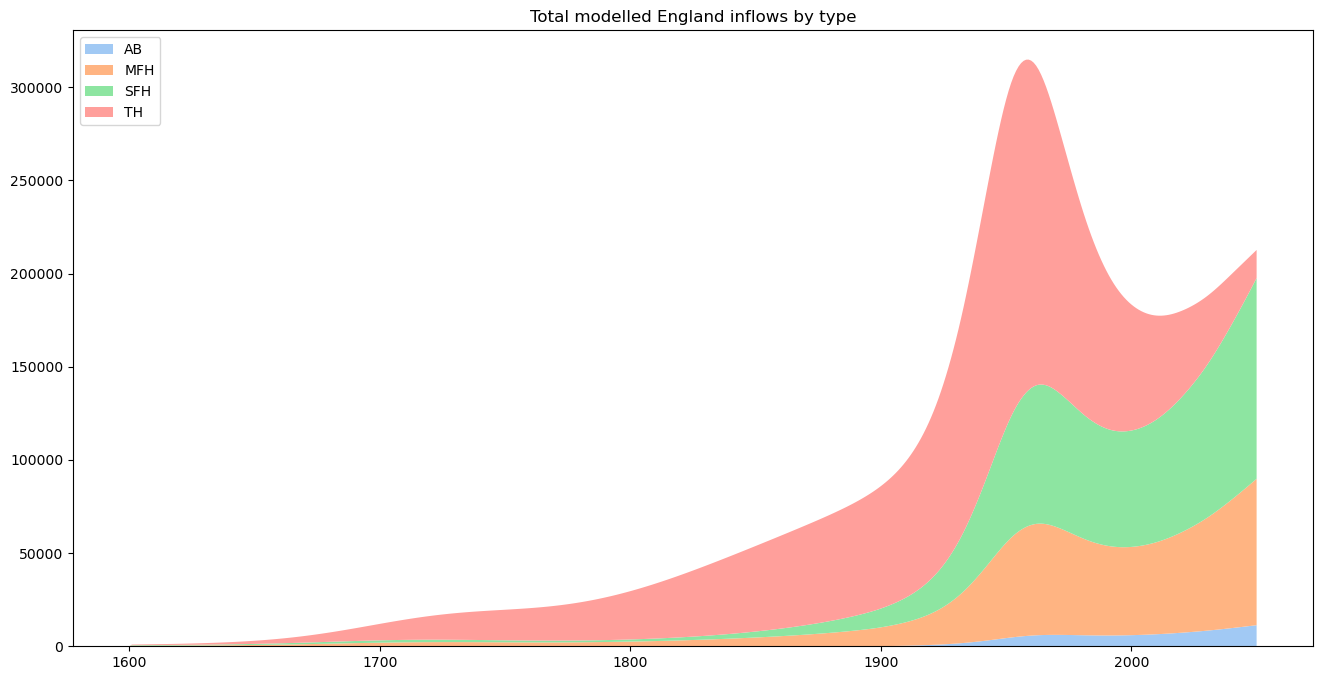

In [62]:
inflows_by_types = [inflow_shares['AB'].to_list(),inflow_shares['MFH'].to_list(),inflow_shares['SFH'].to_list(),inflow_shares['TH'].to_list()]
colors = sns.color_palette('pastel')[0:5]

plt.figure(figsize=(16,8))
plt.stackplot(DSM.index,inflows_by_types, labels=TYP, colors=colors)
plt.legend(loc='upper left')
plt.title('Total modelled England inflows by type')
plt.savefig("Output/Inflows-by-type-shares-1600-2050.png",dpi=300,bbox_inches='tight')
plt.show()

# Stock by type

Input in year 1970:  10944.884354146487
Input modelle in year 1970:  11007.906628154975
Output in year 1970:  10.098209811494026
Input in year 2022:  13608.212866974543
Input modelled in year 2022:  13702.066291104362
Output in year 2022:  813.6359826065882


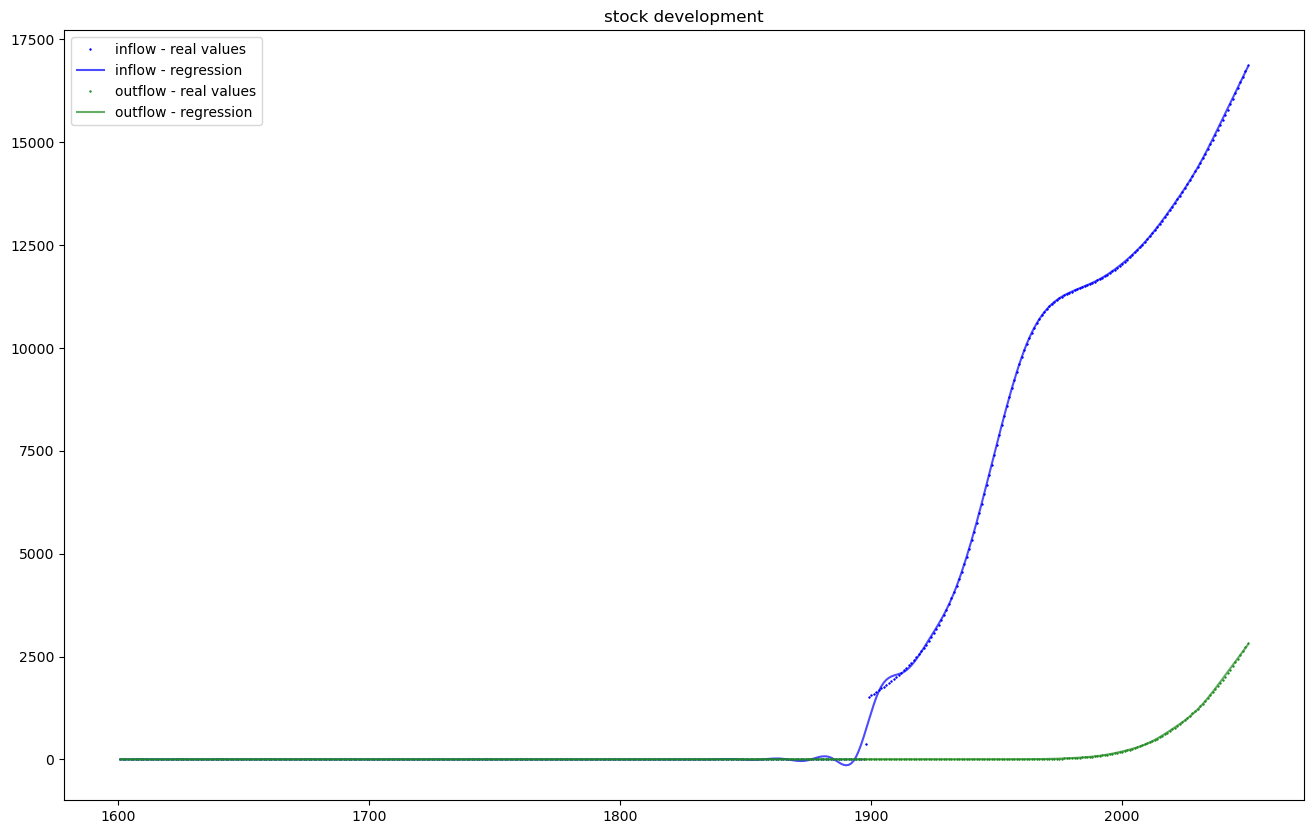

In [206]:
DSM_AB_model = stock_driven_flows(135,25,DSM_AB,"AB dwelling stock")
DSM_AB_model = DSM_AB_model.fillna(0)


Input in year 1970:  79642.19602170808
Input modelle in year 1970:  79588.63155635115
Output in year 1970:  4612.635191156843
Input in year 2022:  87855.81727149869
Input modelled in year 2022:  88426.03655052226
Output in year 2022:  13547.744318812196


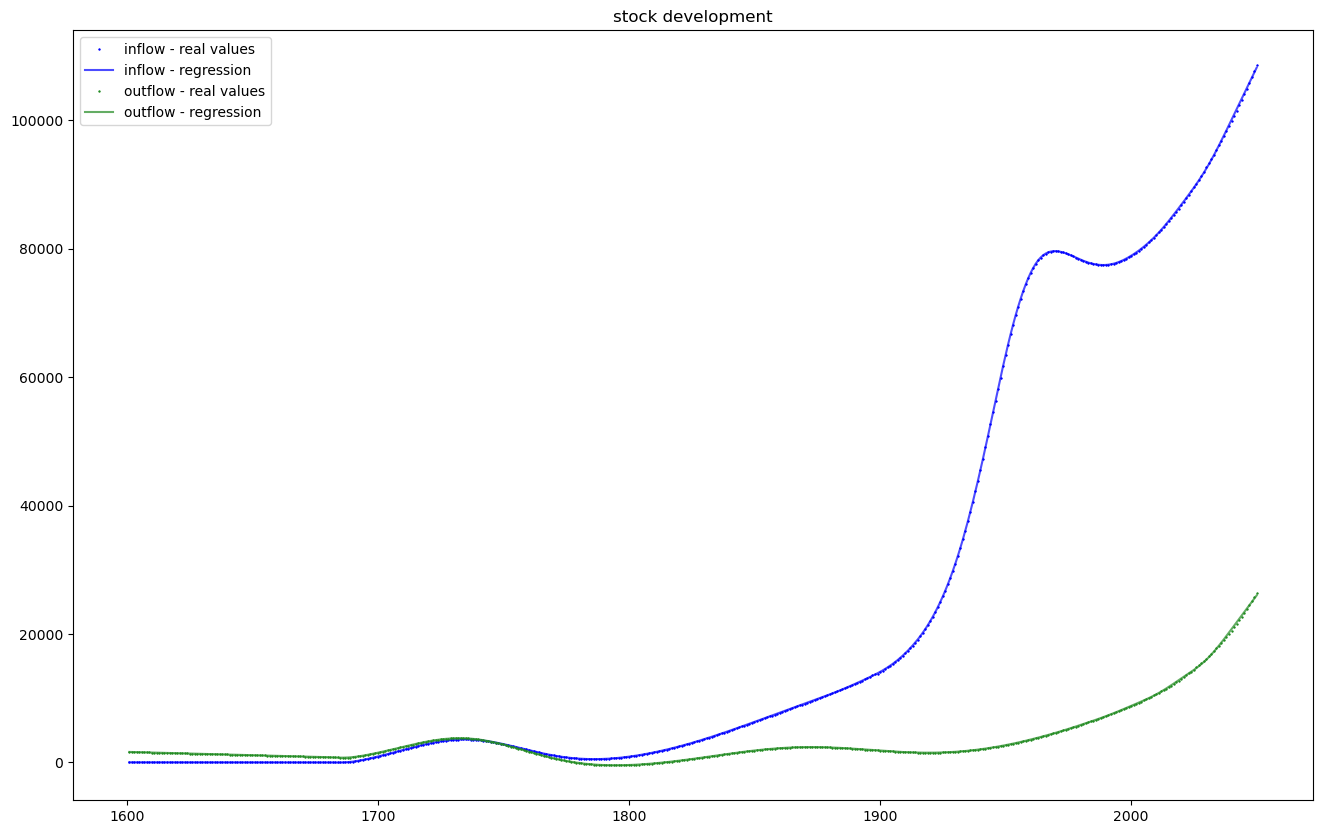

In [221]:
DSM_MFH_model = stock_driven_flows(135,25,DSM_MFH,"MFH dwelling stock")
DSM_MFH_model = DSM_MFH_model.fillna(0)


Input in year 1970:  107268.5406956799
Input modelle in year 1970:  107419.77350895255
Output in year 1970:  4353.340281757123
Input in year 2022:  123865.09819593362
Input modelled in year 2022:  124675.41335498317
Output in year 2022:  16014.049779482832


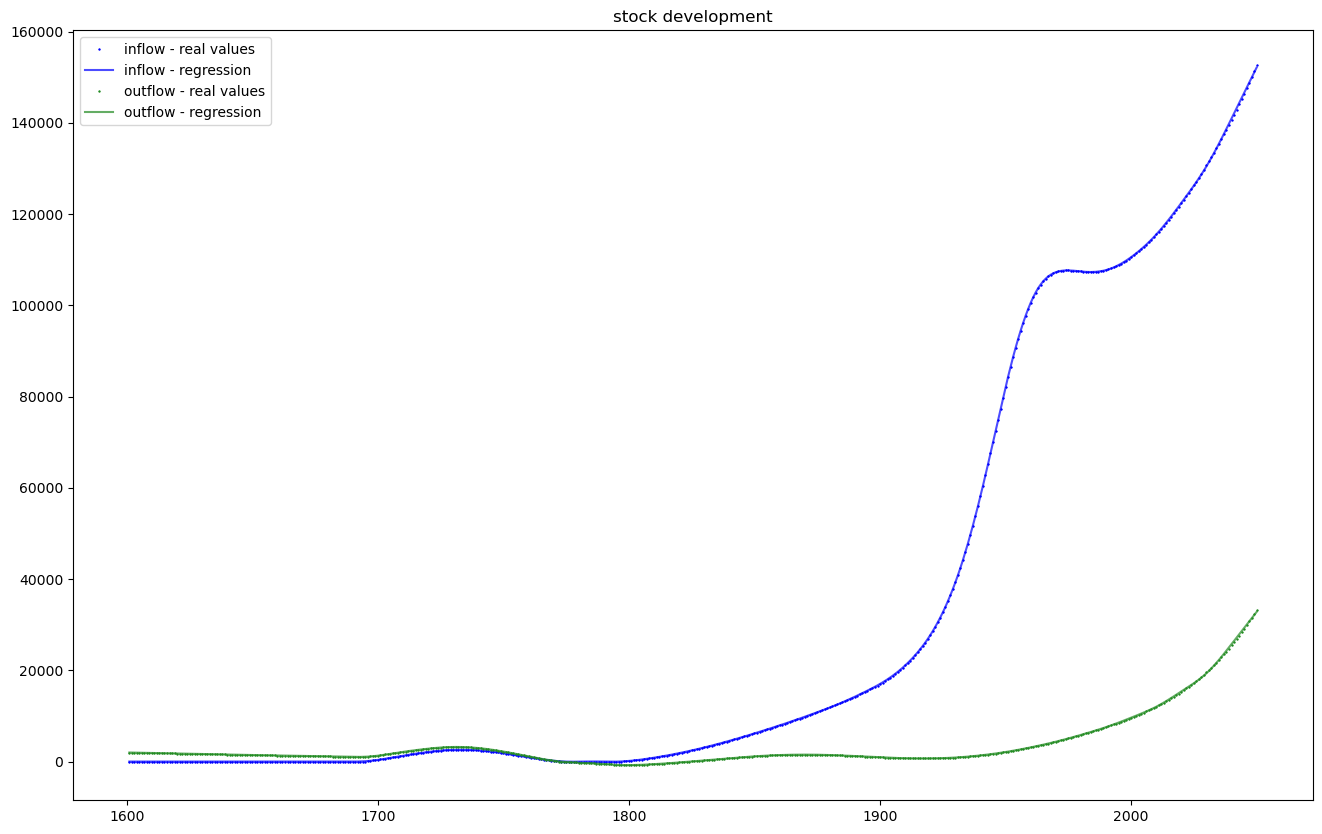

In [222]:
DSM_SFH_model = stock_driven_flows(135,25,DSM_SFH,"SFH dwelling stock")
DSM_SFH_model = DSM_SFH_model.fillna(0)


Input in year 1970:  94077.92516005225
Input modelle in year 1970:  88890.05251605064
Output in year 1970:  53586.3341105485
Input in year 2022:  0.0
Input modelled in year 2022:  -213.99260643647722
Output in year 2022:  123597.40889873303


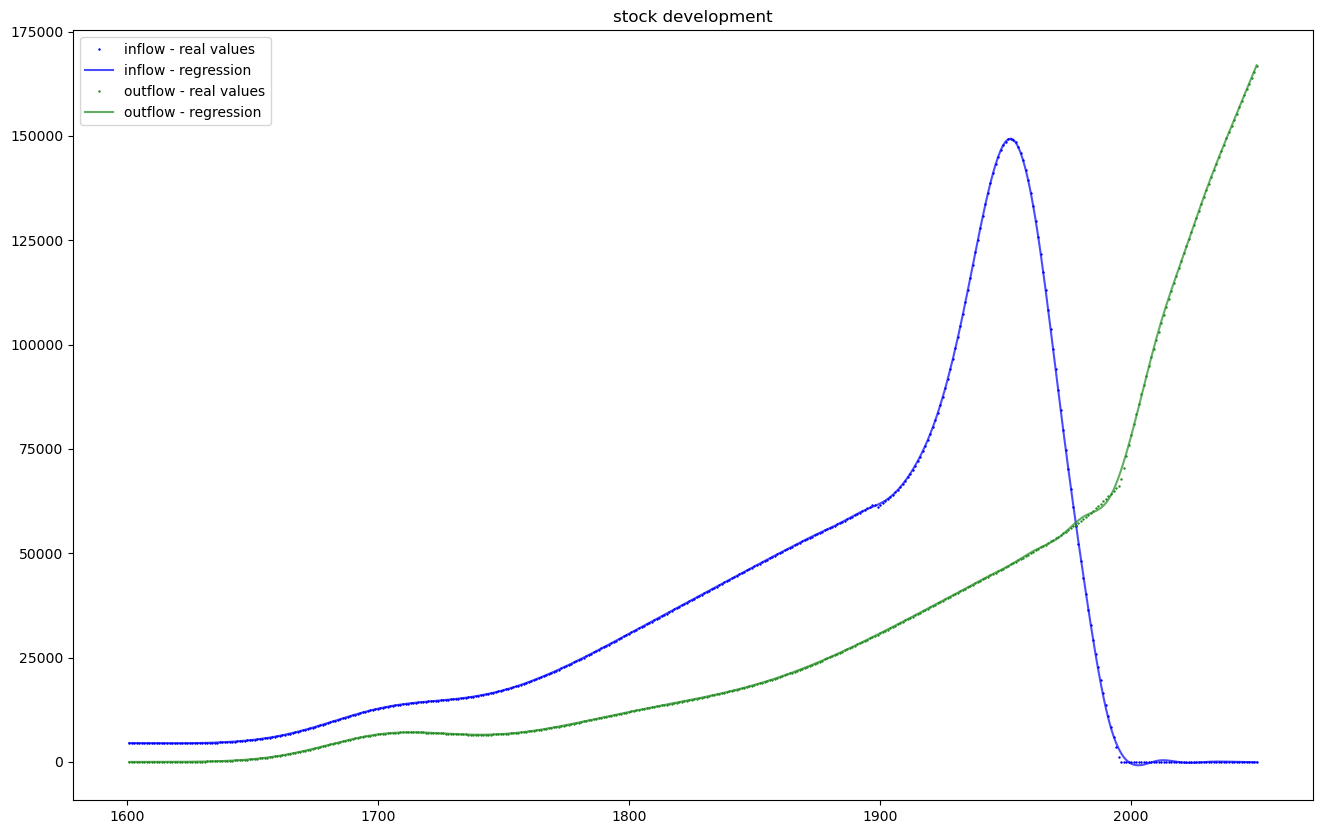

In [223]:
DSM_TH_model = stock_driven_flows(100,25,DSM_TH,"TH dwelling stock")
DSM_TH_model = DSM_TH_model.fillna(0)





# Stock by type (outdated version)

In [7]:
print(TYP)
LT_by_TYP = pd.DataFrame(columns=['TOT']+TYP,index=['mean','deviation'])
LT_by_TYP.loc['mean','AB':'TH'] = [46,61,47,64]
LT_by_TYP.loc['mean','TOT'] = (46+61+47+64)/4 # Not representative of the total dwelling stock however since the # are different
for i in LT_by_TYP.columns:
    # let's take half of the lifetime in the first moment 
    LT_by_TYP.loc['deviation',i] = LT_by_TYP.loc['mean',i]/2
display(LT_by_TYP)

['AB', 'MFH', 'SFH', 'TH']


,TOT,AB,MFH,SFH,TH
mean,54.5,46,61,47,64
deviation,27.25,23.0,30.5,23.5,32.0


 the polynomial our fit created is: 
           4           3         2
2.263e-06 x - 0.01613 x + 43.03 x - 5.095e+04 x + 2.259e+07.
Input in year 1970:  11210.160500863012
Input modelle in year 1970:  11292.840814631072
Output in year 1970:  275.3743565280889
Input in year 2022:  16408.176335888922
Input modelled in year 2022:  16571.631912735396
Output in year 2022:  3613.5994515210714


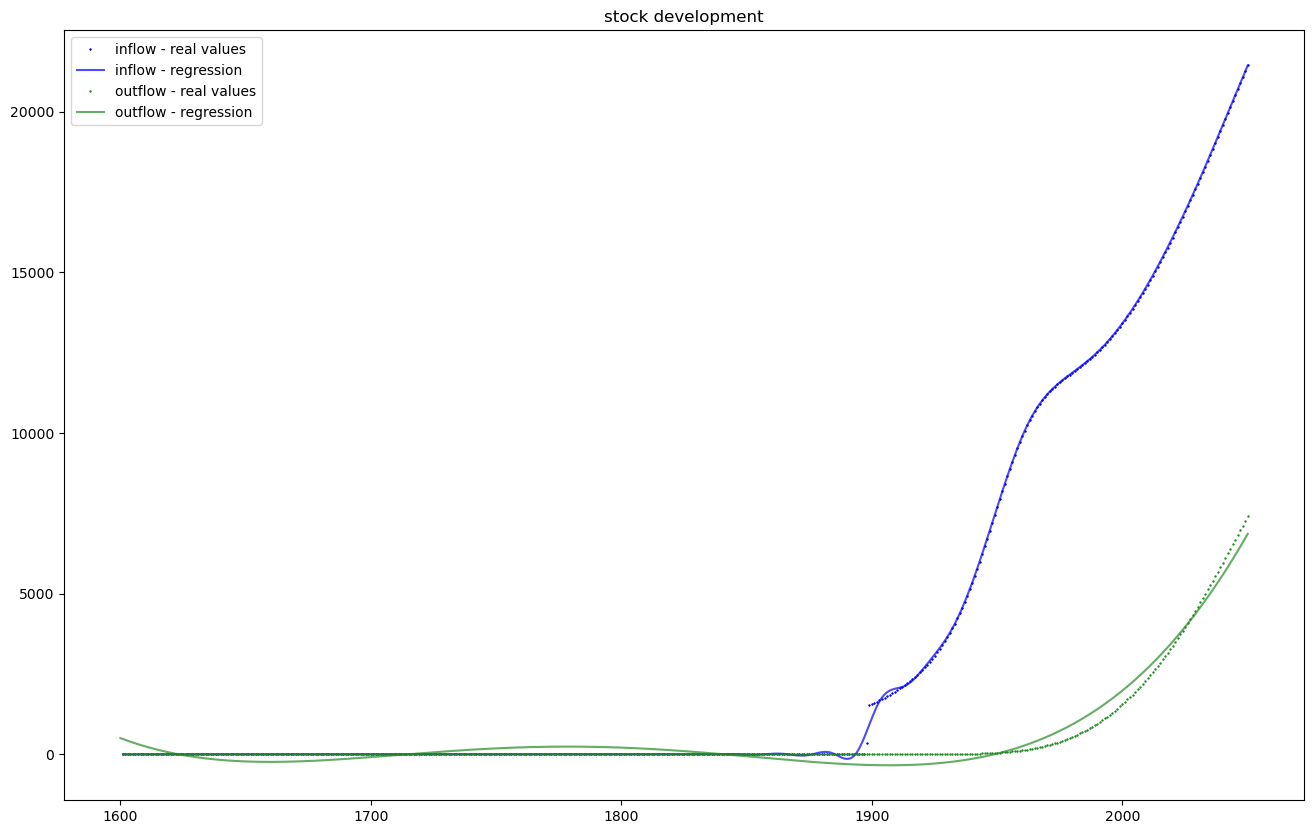

 the polynomial our fit created is: 
           4           3         2
3.441e-06 x - 0.02421 x + 63.71 x - 7.437e+04 x + 3.249e+07.
Input in year 1970:  77555.28515273235
Input modelle in year 1970:  77448.69344079748
Output in year 1970:  2525.724322180308
Input in year 2022:  83832.82376228599
Input modelled in year 2022:  84328.13496950324
Output in year 2022:  9524.750809599695


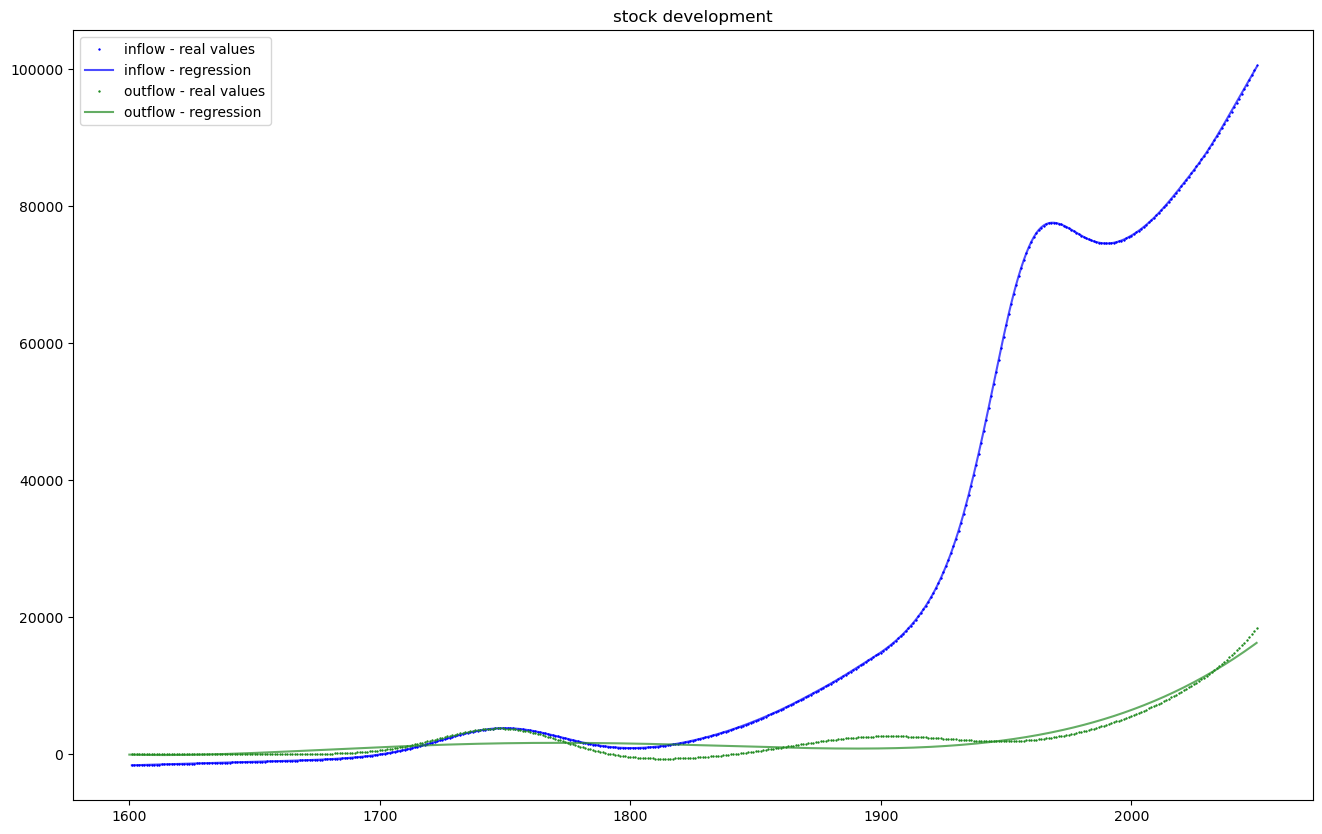

 the polynomial our fit created is: 
          4           3         2
4.74e-06 x - 0.03343 x + 88.23 x - 1.033e+05 x + 4.527e+07.
Input in year 1970:  105013.98593323078
Input modelle in year 1970:  105107.75911632918
Output in year 1970:  2098.7855193094665
Input in year 2022:  118756.98700536609
Input modelled in year 2022:  119451.09886892668
Output in year 2022:  10905.938588916797


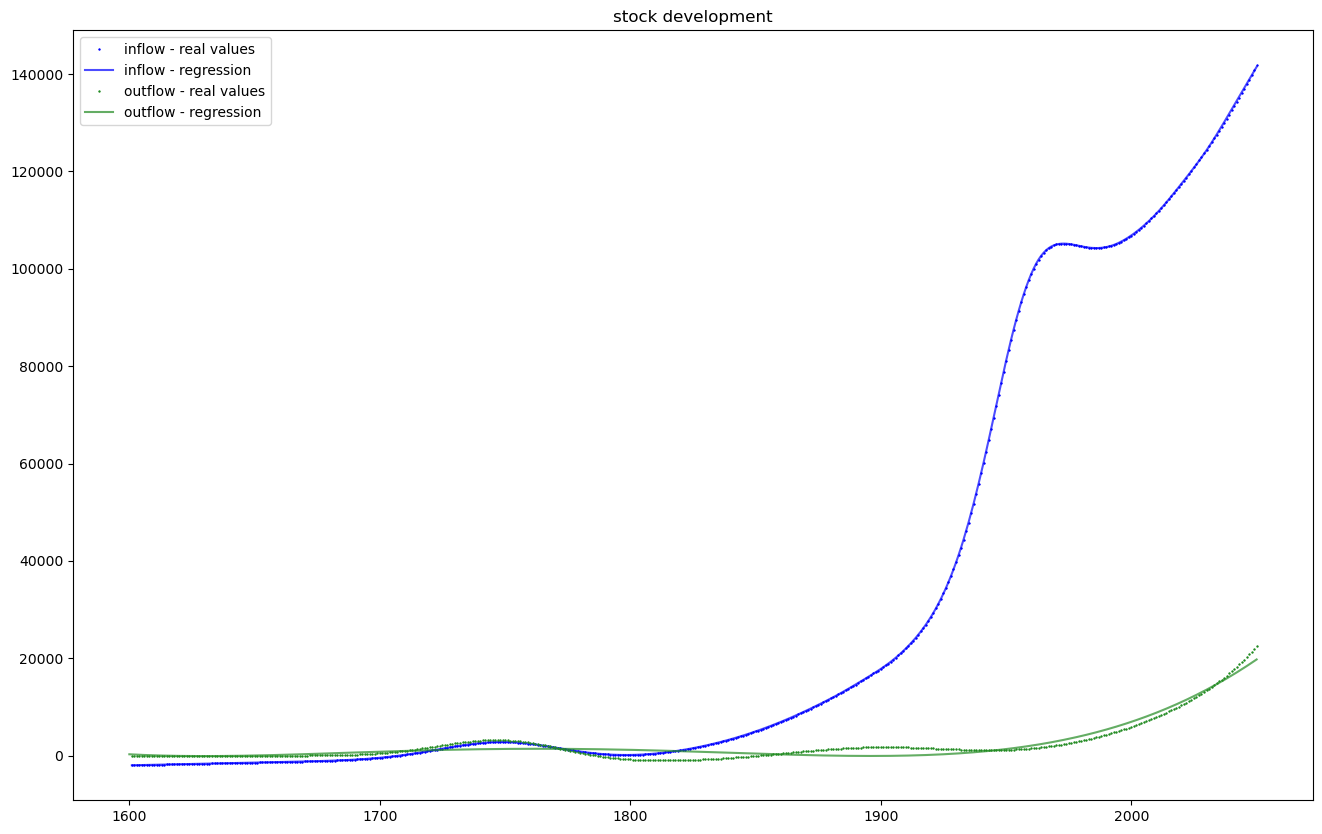

 the polynomial our fit created is: 
          4           3         2
2.16e-06 x - 0.01439 x + 36.02 x - 4.009e+04 x + 1.673e+07.
Input in year 1970:  77606.19735176562
Input modelle in year 1970:  72609.57521155184
Output in year 1970:  37114.606302260494
Input in year 2022:  -69230.65838219164
Input modelled in year 2022:  -70413.93603445591
Output in year 2022:  54366.75051654168


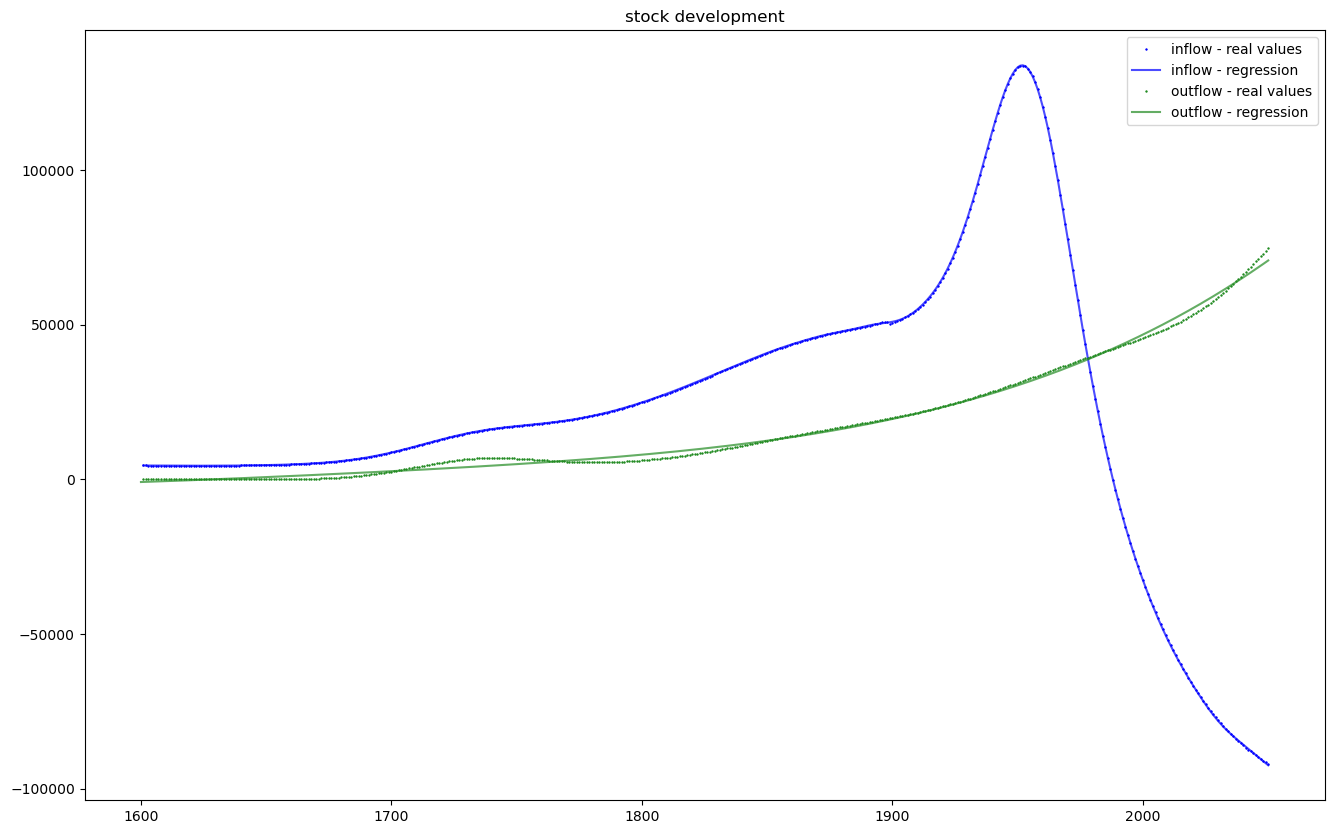

In [86]:
DSM_model_AB = stock_driven_flows(100,25,DSM_AB,"AB dwelling stock")
DSM_model_MFH = stock_driven_flows(150,25,DSM_MFH,"MFH dwelling stock")
DSM_model_SFH = stock_driven_flows(150,25,DSM_SFH,"SFH dwelling stock")
DSM_model_TH = stock_driven_flows(130,25,DSM_TH,"TH dwelling stock")

In [9]:
# VALUES BELOW ZERO WILL NEED TO BE BROUGHT BACK TO ZERO!!!!!! And change cosnequently stock change and stock 
# TBD !!  

def values_to_zeros(dystomod,col):
    for i in dystomod.index:
        dystomod.loc[i,col] = max(dystomod.loc[i,col],0)
    return dystomod

,Population,Stock,PpD,Stock change,Inflow,Outflow
1600,1.633886e+07,8.023560e+05,18.829217,NaN,NaN,NaN
1601,1.644000e+07,8.032679e+05,18.829217,NaN,911.872337,0.007111
1602,1.654114e+07,8.041951e+05,18.829217,NaN,927.179097,0.008751
1603,1.664891e+07,8.051378e+05,18.829217,NaN,942.740980,0.010751
1604,1.676331e+07,8.060963e+05,18.829217,NaN,958.562228,0.013189
...,...,...,...,...,...,...
2046,2.569653e+08,2.558567e+07,9.434460,NaN,166584.416233,115120.201248
2047,2.579716e+08,2.563646e+07,9.434246,NaN,167840.993291,117059.003319
2048,2.589780e+08,2.568656e+07,9.434048,NaN,169133.423134,119025.268217
2049,2.599844e+08,2.573601e+07,9.433866,NaN,170460.087392,121017.583250


Input in year 2022:  149767.32872134933
Output in year 2022:  78411.03936657924


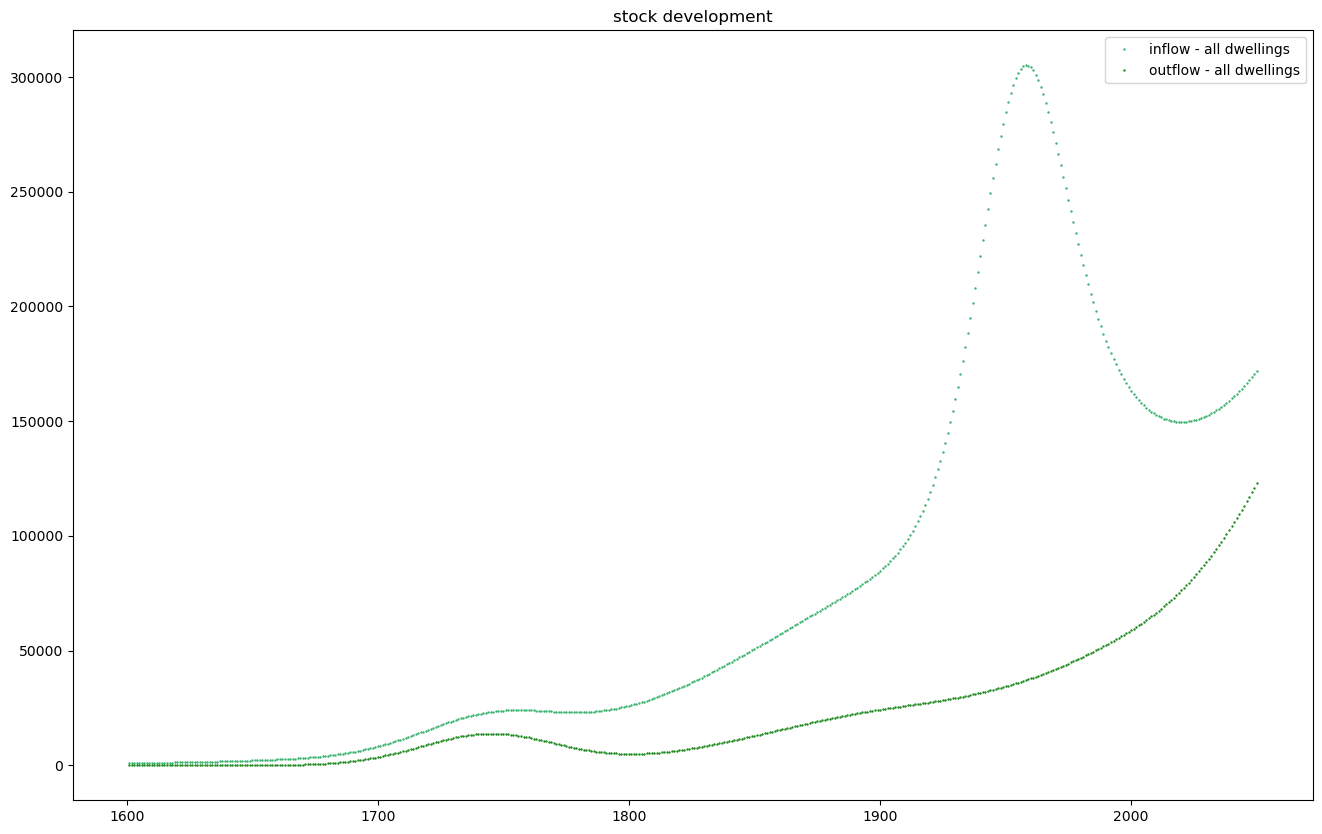

In [10]:
# See above to add the changes 

DSM_model = DSM_model_AB + DSM_model_MFH + DSM_model_SFH + DSM_model_TH 

display(DSM_model)

print('Input in year 2022: ', DSM_model["Inflow"][2022])
print('Output in year 2022: ', DSM_model["Outflow"][2022])

plt.figure(figsize=(16,10))
#plt.plot(year, stock, 'x', color = 'red', markersize = 4, label = f'stock')
plt.plot(DSM_model.index[1:], DSM_model["Inflow"][1:], '+', color = 'mediumseagreen', markersize = 2, label = f'inflow - all dwellings')
plt.plot(DSM_model.index[1:], DSM_model["Outflow"][1:], '+', color = 'forestgreen', markersize = 2, label = f'outflow - all dwellings')
plt.title('stock development')
plt.legend()
plt.show()

Mean :  46
Dev :  23
Input in year 2022:  29135.24743275263
Output in year 2022:  16340.67054838486
Input in year 2022:  4994.101331604951
Output in year 2022:  1992.030324955248
I is:  451
O is:  451


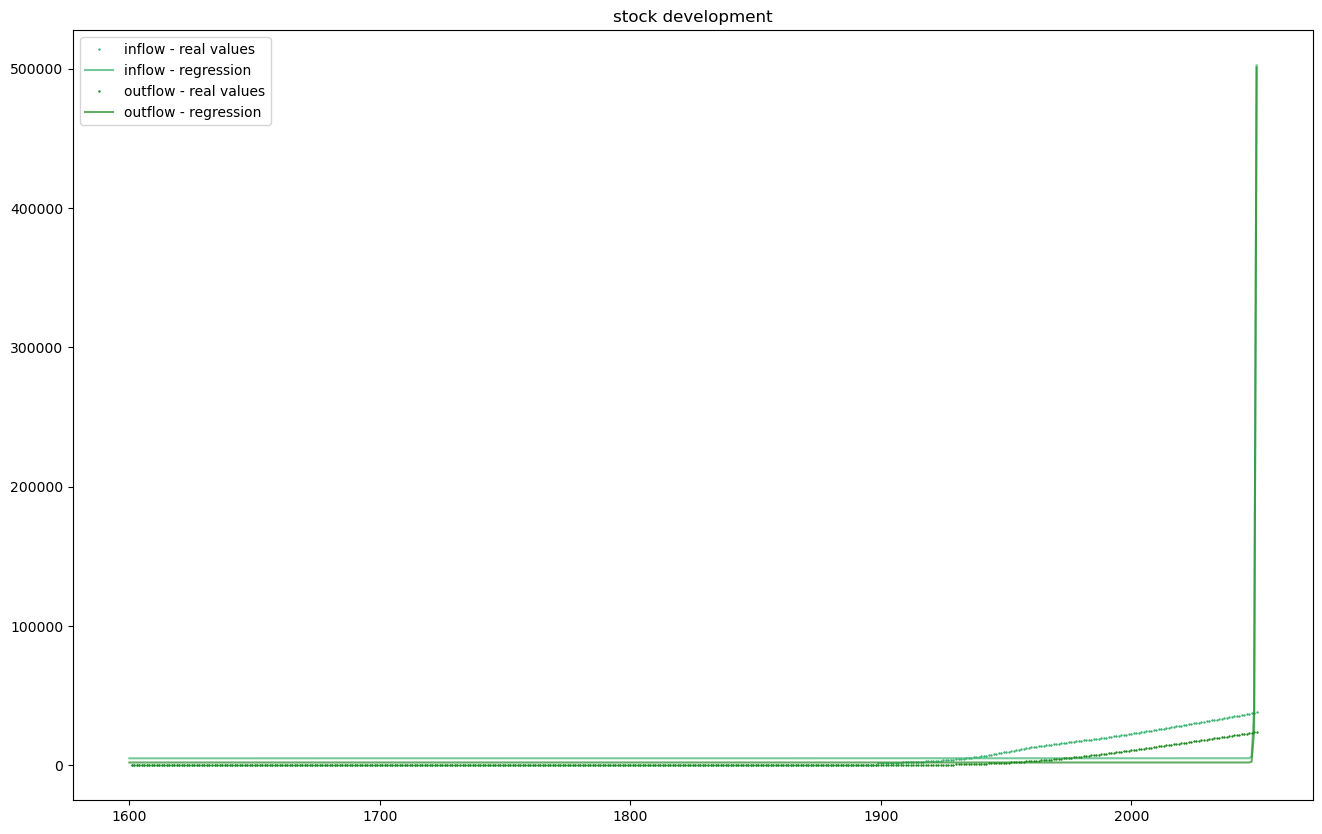

,Population,Stock,PpD,Stock change,Inflow,Outflow
DSM AB,,,,,,
1600,4.084715e+06,0.000000e+00,4.707304,NaN,NaN,NaN
1601,4.110000e+06,0.000000e+00,4.707304,NaN,0.000000,0.000000
1602,4.135285e+06,0.000000e+00,4.707304,NaN,0.000000,0.000000
1603,4.162227e+06,0.000000e+00,4.707304,NaN,0.000000,0.000000
1604,4.190827e+06,0.000000e+00,4.707304,NaN,0.000000,0.000000
...,...,...,...,...,...,...
2046,6.424131e+07,1.316123e+06,2.358615,NaN,36619.371547,22749.035759
2047,6.449291e+07,1.330035e+06,2.358561,NaN,36937.804952,23025.400919
2048,6.474451e+07,1.343989e+06,2.358512,NaN,37256.964664,23302.764069


In [11]:
TYPE = 'AB' # CHANGE 

m = int(LT_by_TYP.loc['mean',TYPE])
d = int(LT_by_TYP.loc['deviation',TYPE])
print('Mean : ',m)
print('Dev : ',d)

lifetime = {
    'Type': 'FoldedNormal', # LogNormal ; FoldedNormal
    'Mean': np.array([m]),
    'StdDev': np.array([d])
}

DSM_TYPE = DSM_AB.copy(deep=True) # CHANGE 

#display(DSM_TYPE)

flow = dsm.DynamicStockModel(t=DSM_TYPE.index,name=TYPE+" dwelling stock",s=np.array(DSM_TYPE['Stock']),lt=lifetime)

S_C, O_C, I = flow.compute_stock_driven_model()
O = flow.compute_outflow_total()
DS = flow.compute_stock_change()

DSM_model = DSM_TYPE.copy(deep=True)
#DSM_model = DSM.set_index('Unnamed: 0')
DSM_model.index.Name = None
#display(DSM_model)

inputs = DSM_TYPE.index
outputs = DSM_TYPE["Stock"]
pred_inputs = DSM_model.index

popt, pcov = curve_fit(logistic_stock, DSM_TYPE.index, O, bounds = ([min(inputs), 0, 10**3, 10**6], [max(inputs), 10**5, 10**6, 10**8]))
O_model = logistic_stock(DSM_model.index, *popt)

popt, pcov = curve_fit(logistic_stock, DSM_TYPE.index, I, bounds = ([min(inputs), 0, 10**3, 10**6], [max(inputs), 10**5, 10**6, 10**8]))
I_model = logistic_stock(DSM_model.index, *popt)

print('Input in year 2022: ', I[2022-1600])
print('Output in year 2022: ', O[2022-1600])
print('Input in year 2022: ', I_model[2022-1600])
print('Output in year 2022: ', O_model[2022-1600])
print('I is: ', len(I))
print('O is: ', len(O))

"""
degree = 4
polynomial_I = np.poly1d(np.polyfit(DSM_model.index, I, degree))
print(f' the polynomial our fit created is: \n{polynomial_I}.')
AB_size_evolution_reg = polynomial_I(DSM_model.index)
plt.figure(figsize=(16,10))
plt.plot(DSM_model.index[1:], I[1:], 's', color = 'black', markersize = 1, label = f'dwelling size')
plt.plot(DSM_model.index, AB_size_evolution_reg, color = 'crimson', lw = 1, label = f'polynomial regression (degree {degree}) values')
plt.title('polynomial regression on AB dwelling size data set')
plt.legend()
plt.show()
"""

plt.figure(figsize=(16,10))
plt.plot(DSM_model.index[1:], I[1:], '+', color = 'mediumseagreen', markersize = 2, label = f'inflow - real values')
plt.plot(DSM_model.index, I_model, color = 'mediumseagreen', markersize = 1, label = f'inflow - regression', alpha=0.7)
plt.plot(DSM_model.index[1:], O[1:], '+', color = 'forestgreen', markersize = 2, label = f'outflow - real values')
plt.plot(DSM_model.index, O_model, color = 'forestgreen', markersize = 1, label = f'outflow - regression', alpha=0.7)
plt.title('stock development')
plt.legend()
plt.show()

DSM_model['Outflow'][1:] = O[1:]
DSM_model['Inflow'][1:] = I[1:]

display(DSM_model)

Shares

In [12]:
TYPE_shares = pd.read_csv("Model/modelled-types-by-share-1600-2050.csv")
TYPE_shares = TYPE_shares.set_index("Unnamed: 0")
TYPE_shares.index.name = None
display(TYPE_shares)

,SFH,MFH,TH,AB
1900,0.126292,0.201657,0.669245,0.002806
1931,0.152695,0.084561,0.757011,0.005733
1954,0.167678,0.133738,0.680153,0.018431
1972,0.260082,0.205305,0.494069,0.040543
1985,0.396733,0.237419,0.359491,0.006358
1997,0.410357,0.204394,0.374287,0.010962
2008,0.251174,0.347418,0.343897,0.057512
1600,0.200000,0.400000,0.400000,0.000000


# Calibration and validation

In [143]:
# England total completions => total number of new constructions 

file = "Data/GOV UK/CBP07671---Housing-supply---Historical-statistics-for-the-UK.xlsx"
sh = "HB.E"
housing_supply = pd.read_excel(file,sheet_name=sh)

housing_supply.columns = housing_supply.loc[0,:]
housing_supply = housing_supply.drop(index=0,columns="Notes")
housing_supply = housing_supply.set_index('Year')
housing_supply.index.name = None

display(housing_supply)

housing_supply_total = pd.DataFrame(housing_supply['Total completions'])

display(housing_supply_total)

,No. of completions by private enterprise,No. of completions by social housing developers,"Of which, no. of completions by local authorities","Of which, no. of completions by housing associations",Total completions,Percentage of total completions by private enterprise,Percentage of total completions by social housing developers,"Of which, percentage of completions by local authorities","Of which, percentage of completions by housing associations",Total
1946,28760,20500,20400,100,49250,0.583959,0.416244,0.414213,0.00203,1
1947,38630,82230,81370,860,120860,0.319626,0.680374,0.673258,0.007116,1
1948,30370,163220,161400,1820,193590,0.156878,0.843122,0.833721,0.009401,1
1949,23800,138310,136980,1330,162110,0.146814,0.853186,0.844982,0.008204,1
1950,25310,138030,136530,1500,163340,0.154953,0.845047,0.835864,0.009183,1
...,...,...,...,...,...,...,...,...,...,...
2018,135210,30280,2690,27590,165490,0.817028,0.182972,0.016255,0.166717,1
2019,143690,34190,2190,32000,177880,0.807792,0.192208,0.012312,0.179897,1
2020,120030,26590,1270,25320,146620,0.818647,0.181353,0.008662,0.172691,1
2021,142130,32820,1590,31230,174940,0.81245,0.187607,0.009089,0.178518,1


,Total completions
1946,49250
1947,120860
1948,193590
1949,162110
1950,163340
...,...
2018,165490
2019,177880
2020,146620
2021,174940


In [145]:
# TBD Calculate here the ration thanks to recent construction / change of use data 

ratio = 0.16431673850261094

In [146]:
housing_inflow_total = housing_supply_total.copy(deep=True)
housing_inflow_total.columns = ['Inflow']
for i in housing_inflow_total.index:
    housing_inflow_total.loc[i,'Inflow'] *= (1+ratio)

display(housing_inflow_total)

,Inflow
1946,57342.599371
1947,140719.321015
1948,225400.077407
1949,188747.386479
1950,190179.496067
...,...
2018,192682.777055
2019,207108.661445
2020,170712.120199
2021,203685.570234


<AxesSubplot:>

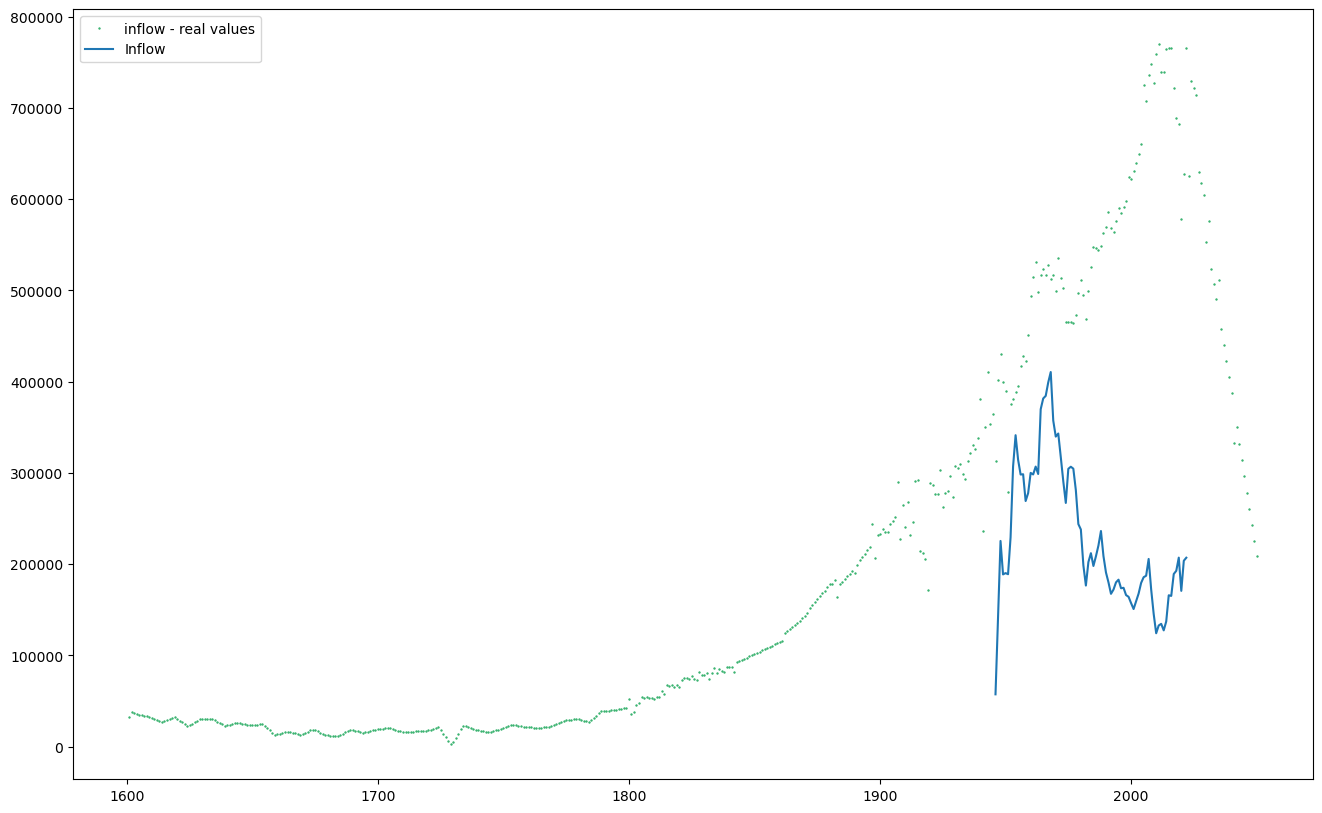

In [62]:
plt.figure(figsize=(16,10))
plt.plot(DSM_model.index[1:], I[1:], '+', color = 'mediumseagreen', markersize = 2, label = f'inflow - real values')
sns.lineplot(housing_inflow_total)

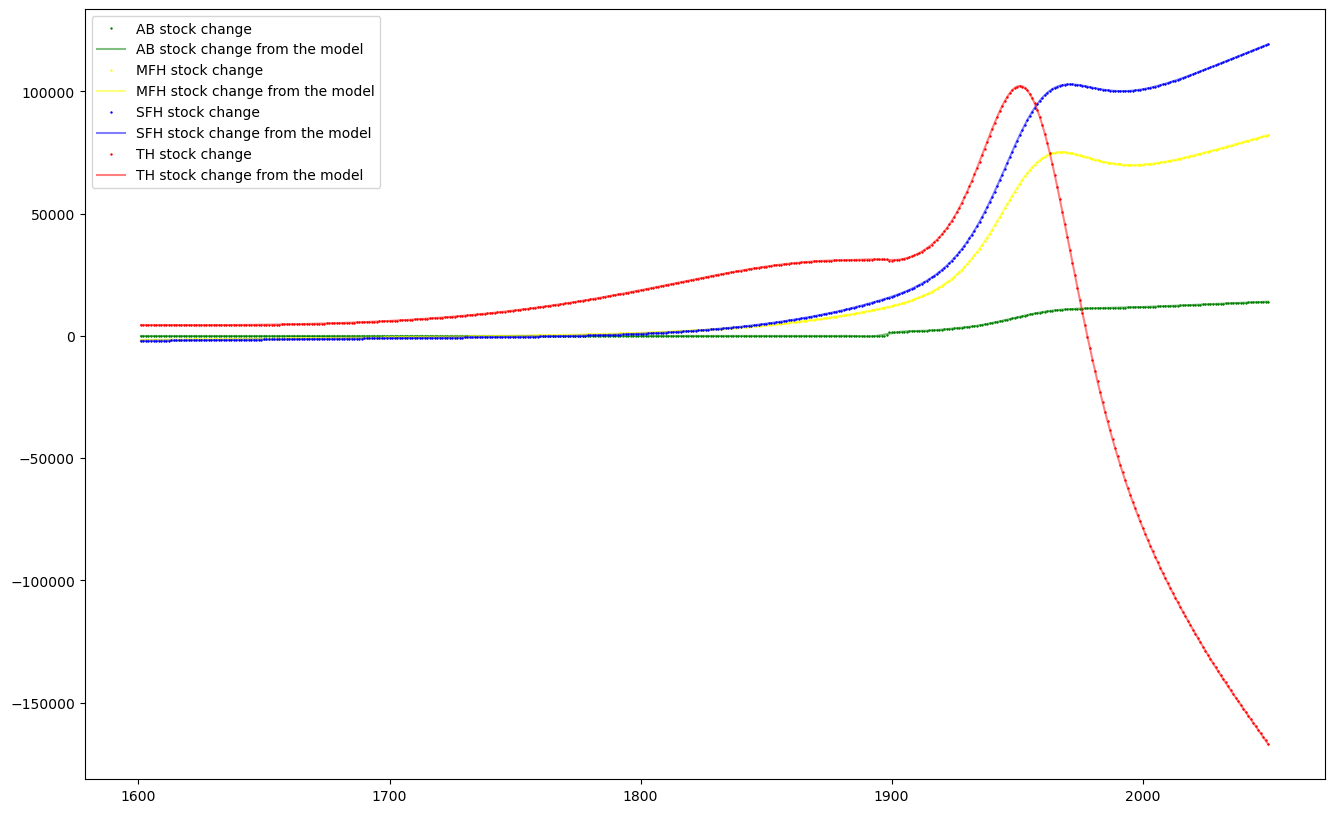

In [196]:
### Check that Inflow - Outflow = Stock Change
#DSM_AB_model=pd.DataFrame(DSM_AB_model)

plt.figure(figsize=(16,10))
DSM_AB_model['Stock change']= DSM_AB_model['Stock'].diff()
DSM_MFH_model['Stock change']= DSM_MFH_model['Stock'].diff()
DSM_SFH_model['Stock change']= DSM_SFH_model['Stock'].diff()
DSM_TH_model['Stock change']= DSM_TH_model['Stock'].diff()



plt.plot(DSM_AB_model['Stock change'], '+', color = 'green', markersize = 2,label='AB stock change')
plt.plot(DSM_AB_model['Inflow']-DSM_AB_model['Outflow'],color = 'green',markersize = 1, label = 'AB stock change from the model',alpha=0.5)

plt.plot(DSM_MFH_model['Stock change'], '+',color = 'yellow', markersize = 2,label='MFH stock change')
plt.plot(DSM_MFH_model['Inflow']-DSM_MFH_model['Outflow'],color = 'yellow',markersize = 1, label = 'MFH stock change from the model',alpha=0.5)

plt.plot(DSM_SFH_model['Stock change'], '+', color='blue',markersize = 2,label='SFH stock change')
plt.plot(DSM_SFH_model['Inflow']-DSM_SFH_model['Outflow'], color = 'blue',markersize = 1, label = 'SFH stock change from the model',alpha=0.5)

plt.plot(DSM_TH_model['Stock change'], '+', color='red', markersize = 2,label='TH stock change')
plt.plot(DSM_TH_model['Inflow']-DSM_TH_model['Outflow'],color='red',markersize = 1,label = 'TH stock change from the model',alpha=0.5)

plt.legend()
plt.show()


Input in year 1970:  283250.9353443275
Input modelle in year 1970:  278509.0821266448
Output in year 1970:  53879.79690600978
Input in year 2022:  181107.69381557137
Input modelled in year 2022:  181804.88408932742
Output in year 2022:  109751.40446079607


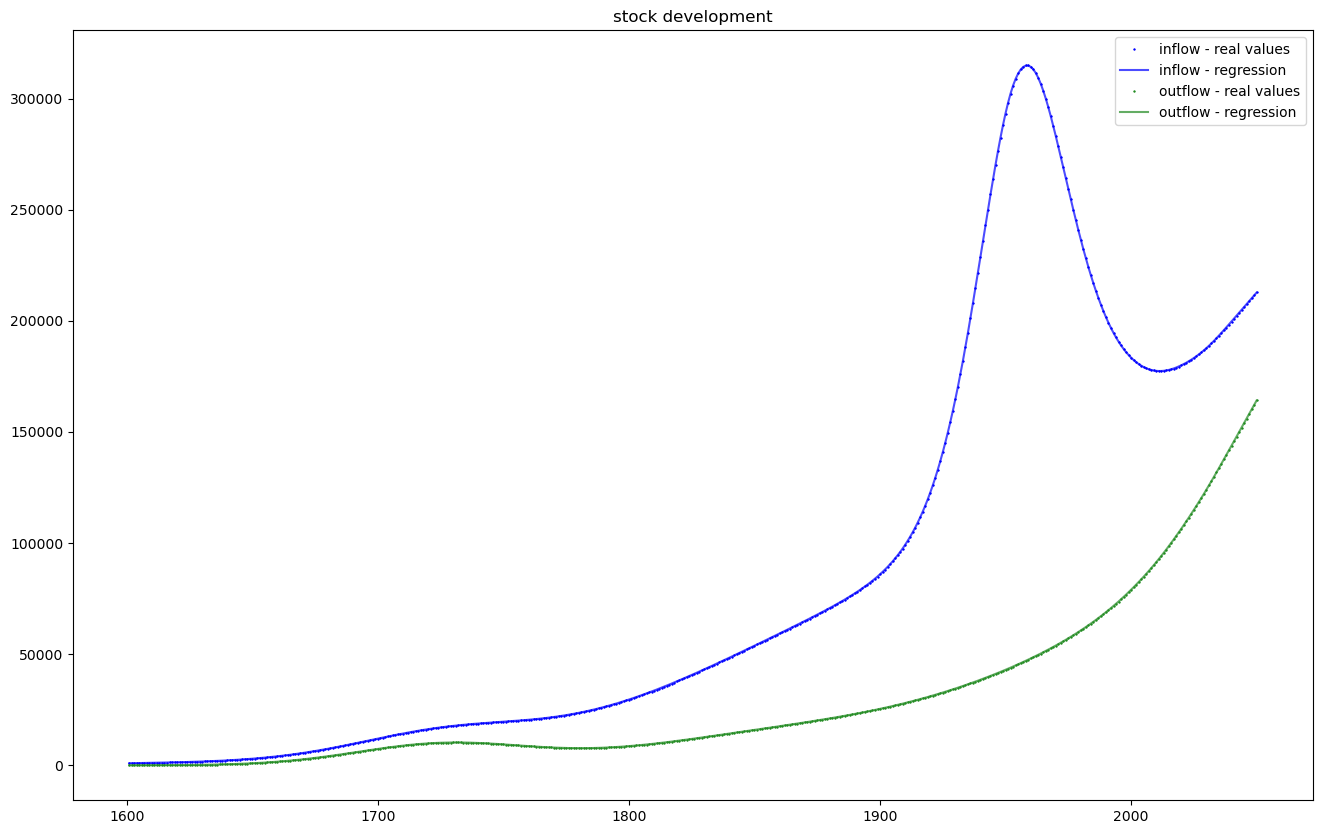

<Figure size 640x480 with 0 Axes>

In [ ]:
def stock_driven_flows(lt_mean,lt_dev,dystomod,nm="dwelling stock"):
    lifetime = {
    'Type': 'Normal', # LogNormal ; FoldedNormal ; #Normal
    'Mean': np.array([lt_mean]), 
    'StdDev': np.array([lt_dev])
    }
    flow = dsm.DynamicStockModel(t=dystomod.index,name=nm,s=np.array(dystomod['Stock']),lt=lifetime)
    S_C, O_C, I = flow.compute_stock_driven_model()
    O = flow.compute_outflow_total()
    DS = flow.compute_stock_change()
    #display(I)
    #display(O)
    DSM_model = dystomod.copy(deep=True)
    #DSM_model = DSM.set_index('Unnamed: 0')
    DSM_model.index.name = None
    #display(DSM_model)
    
    ### If there are negative values ###
    I=np.array(I)
    O=np.array(O)
    I_copy=I.copy()
    I[I<0]=0
    diff=I-I_copy
    O=O+diff
    # difference = np.abs(I -np.max(0,I))
    # I = I.apply(lambda x: max(0, x))
    # O = O + difference
    
    inputs = dystomod.index
    outputs = dystomod["Stock"]
    pred_inputs = DSM_model.index
    inputs = np.array(inputs)
    pred_inputs=np.array(pred_inputs)
    outputs=np.array(outputs)
    
    ### Logistic regression ###
    # popt, pcov = curve_fit(logistic_stock, dystomod.index, O, bounds = ([min(inputs), 0, 10**3, 10**6], [max(inputs), 10**5, 10**6, 10**8]))
    # O_model = logistic_stock(DSM_model.index, *popt)
    # popt, pcov = curve_fit(logistic_stock, dystomod.index, I, bounds = ([min(inputs), 0, 10**3, 10**6], [max(inputs), 10**5, 10**6, 10**8]))
    # I_model = logistic_stock(DSM_model.index, *popt)
    
    # ## Polynomial regression ###
    # degree_I=6
    # polynomial_I = np.poly1d(np.polyfit(DSM_model.index, I, degree_I))
    # print(f' the polynomial our fit created is: \n{polynomial_I}.')
    # I_model = polynomial_I(pred_inputs)
    
    # degree_O=4
    # polynomial_O = np.poly1d(np.polyfit(DSM_model.index, O, degree_O))
    # print(f' the polynomial our fit created is: \n{polynomial_O}.')
    # O_model = polynomial_O(pred_inputs)
    
    # ### NCS regression ###
    no_knots = int(len(O)/10)
    ncs_model = ncs.get_natural_cubic_spline_model(inputs[1:], O[1:], minval=min(inputs), maxval=max(inputs), n_knots = no_knots)
    O_model = ncs_model.predict(inputs[1:])
    fit_label = f'natural cubic splines with {no_knots} knots'
    
    no_knots = int(len(I)/10)
    ncs_model = ncs.get_natural_cubic_spline_model(inputs[1:], I[1:], minval=min(inputs), maxval=max(inputs), n_knots = no_knots)
    I_model = ncs_model.predict(inputs[1:])
    fit_label = f'natural cubic splines with {no_knots} knots'
    
    
    # plt.figure(figsize=(16,10))
    # plt.plot(DSM_model.index[1:], I[1:], 's', color = 'black', markersize = 1, label = f'dwelling size')
    # plt.plot(DSM_model.index, AB_size_evolution_reg, color = 'crimson', lw = 1, label = f'polynomial regression (degree {degree}) values')
    # plt.title('polynomial regression on AB dwelling size data set')
    # plt.legend()
    # plt.show()
    
    
    print('Input in year 1970: ', I[1970-1600])
    print('Input modelle in year 1970: ', I_model[1970-1600])
    print('Output in year 1970: ', O[1970-1600])
    print('Input in year 2022: ', I[2022-1600])
    print('Input modelled in year 2022: ', I_model[2022-1600])
    print('Output in year 2022: ', O[2022-1600])
    #print('Model input in year 2022: ', I_model[2022-1600])
    #print('Model output in year 2022: ', O_model[2022-1600])
    #print('I is: ', len(I))
    #print('O is: ', len(O))
    plt.figure(figsize=(16,10))
    #plt.plot(year, stock, 'x', color = 'red', markersize = 4, label = f'stock')
    plt.plot(DSM_model.index[1:], I[1:], '+', color = 'blue', markersize = 2, label = f'inflow - real values')
    plt.plot(DSM_model.index[1:], I_model, color = 'blue', markersize = 1, label = f'inflow - regression', alpha=0.7)
    plt.plot(DSM_model.index[1:], O[1:], '+', color = 'forestgreen', markersize = 2, label = f'outflow - real values')
    plt.plot(DSM_model.index[1:], O_model, color = 'forestgreen', markersize = 1, label = f'outflow - regression', alpha=0.7)
    plt.title('stock development')
    plt.legend()
    plt.show()
    DSM_model['Outflow'][1:] = O_model
    DSM_model['Inflow'][1:] = I_model
    #display(DSM_model)
    return DSM_model,I_model,O_model

DSM_model = stock_driven_flows(125,35,DSM,"total dwelling stock")
plt.savefig('Output/Inflow-Outflow-Regression.png',dpi=300,bbox_inches='tight')


# Creation of the tables

In [46]:
times_index = range(1600,2051)
cohort_index = range(1600,2051)

stock_AB = pd.DataFrame(index=times_index, columns=cohort_index)
stock_AB=stock_AB.fillna(0)

display(stock_AB)

stock_MFH = pd.DataFrame(index=times_index, columns=cohort_index)
stock_MFH=stock_MFH.fillna(0)

stock_SFH = pd.DataFrame(index=times_index, columns=cohort_index)
stock_SFH=stock_SFH.fillna(0)

stock_TH = pd.DataFrame(index=times_index, columns=cohort_index)
stock_TH=stock_TH.fillna(0)

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
1600,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1601,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1602,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1603,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1604,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
display(DSM_AB_model)

NameError: name 'DSM_AB_model' is not defined

In [48]:
def lifetime(t,c,sigma=125,tau=35):
    lifetime = 1/(sigma*sqrt(2*pi))*exp(-(t-c-tau)**2/(2*sigma**2))
    return(lifetime)

def remain_stock(inflow,t,c,sigma=125,tau=35):
    if t==c:
        remain_stock=inflow
    else:
        total_lifetime_distribution=0
        for i in range(c,t+1):
            total_lifetime_distribution+=lifetime(i,c)
        remain_stock=inflow-inflow*total_lifetime_distribution
    return(remain_stock)

In [49]:
for c in range (1600,2051):
    for t in range(c,2051):
        stock_AB.loc[t,c]=remain_stock(inflow_shares.loc[c,'AB'],t,c)
        
stock_AB.head()

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
1600,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1601,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1602,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1603,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
for c in range (1600,2051):
    for t in range(c,2051):
        stock_MFH.loc[t,c]=remain_stock(inflow_shares.loc[c,'MFH'],t,c)
        
stock_MFH.head()

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
1600,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1601,0,314.763354,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1602,0,312.829295,319.750989,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1603,0,311.859121,317.786284,324.648657,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,0,310.886926,316.800736,322.653858,329.457086,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
for c in range (1600,2051):
    for t in range(c,2051):
        stock_SFH.loc[t,c]=remain_stock(inflow_shares.loc[c,'SFH'],t,c)
        
stock_SFH.head()

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
1600,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1601,0,284.439869,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1602,0,282.692133,288.346469,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1603,0,281.815423,286.574729,292.149266,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,0,280.936887,285.685978,290.354159,295.849208,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
for c in range (1600,2051):
    for t in range(c,2051):
        stock_TH.loc[t,c]=remain_stock(inflow_shares.loc[c,'TH'],t,c)
        
stock_TH.head()

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
1600,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1601,0,317.292166,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1602,0,315.342570,329.473430,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1603,0,314.364601,327.448986,341.848464,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,0,313.384595,326.433471,339.747982,354.415592,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
display(stock_AB)

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
1600,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1601,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1602,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1603,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1604,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0,0,0,0,0,0,0,0,0,0,...,9717.521267,9897.761928,10080.250389,10264.999652,10452.022625,10674.089303,0.000000,0.000000,0.000000,0.000000
2047,0,0,0,0,0,0,0,0,0,0,...,9686.761541,9866.589253,10048.664169,10232.999374,10419.607862,10608.502531,10832.940856,0.000000,0.000000,0.000000
2048,0,0,0,0,0,0,0,0,0,0,...,9655.945658,9835.357669,10017.016233,10200.934519,10387.125606,10575.602478,10766.378023,10993.201521,0.000000,0.000000
2049,0,0,0,0,0,0,0,0,0,0,...,9625.075491,9804.069066,9985.308489,10168.807012,10354.577800,10542.633922,10732.988352,10925.653968,11154.876195,0.000000


# Plot

In [63]:
columns=['Population','Stock','PpD','Stock Change', 'Inflow','Outflow']
index=range(1600,2051)
donnees = {
    'Population': [0] * len(index),
    'Stock': [0] * len(index),
    'PpD': [0] * len(index),
    'Stock Change' : [0] * len(index),
    'Inflow' : [0] * len(index),
    'Outflow' : [0] * len(index)}

DSM_AB_model = pd.DataFrame(donnees, index=index)
DSM_MFH_model = pd.DataFrame(donnees, index=index)
DSM_SFH_model = pd.DataFrame(donnees, index=index)
DSM_TH_model = pd.DataFrame(donnees, index=index)


In [64]:
display(inflow_shares)

,AB,MFH,SFH,TH
1600,0.000000,0.000000,0.000000,0.000000
1601,0.000000,314.763354,284.439869,317.292166
1602,0.000000,319.750989,288.346469,329.473430
1603,0.000000,324.648657,292.149266,341.848464
1604,0.000000,329.457086,295.849208,354.415592
...,...,...,...,...
2046,10674.089303,74607.109428,102055.791335,20169.298776
2047,10832.940856,75587.856720,103452.900458,18931.451816
2048,10993.201521,76577.294159,104862.494088,17671.021090
2049,11154.876195,77575.464374,106284.628802,16387.902495


In [65]:
DSM_AB_model['Inflow']=inflow_shares['AB']
DSM_MFH_model['Inflow']=inflow_shares['MFH']
DSM_SFH_model['Inflow']=inflow_shares['SFH']
DSM_TH_model['Inflow']=inflow_shares['TH']

In [67]:
display(stock_AB.sum(axis=1).diff())

1600            NaN
1601       0.000000
1602       0.000000
1603       0.000000
1604       0.000000
           ...     
2046    8447.844207
2047    8575.349802
2048    8703.829994
2049    8833.285877
2050    8963.718538
Length: 451, dtype: float64

In [82]:
DSM_AB_model['Stock change'] = stock_AB.sum(axis=1).diff()
DSM_MFH_model['Stock change'] = stock_MFH.sum(axis=1).diff()
DSM_SFH_model['Stock change'] = stock_SFH.sum(axis=1).diff()
DSM_TH_model['Stock change'] = stock_TH.sum(axis=1).diff()

In [71]:
DSM_AB_model['Outflow'] = inflow_shares['AB'] - stock_AB.sum(axis=1).diff()
DSM_MFH_model['Outflow'] = inflow_shares['MFH'] - stock_MFH.sum(axis=1).diff()
DSM_SFH_model['Outflow'] = inflow_shares['SFH'] - stock_SFH.sum(axis=1).diff()
DSM_TH_model['Outflow'] = inflow_shares['TH'] - stock_TH.sum(axis=1).diff()

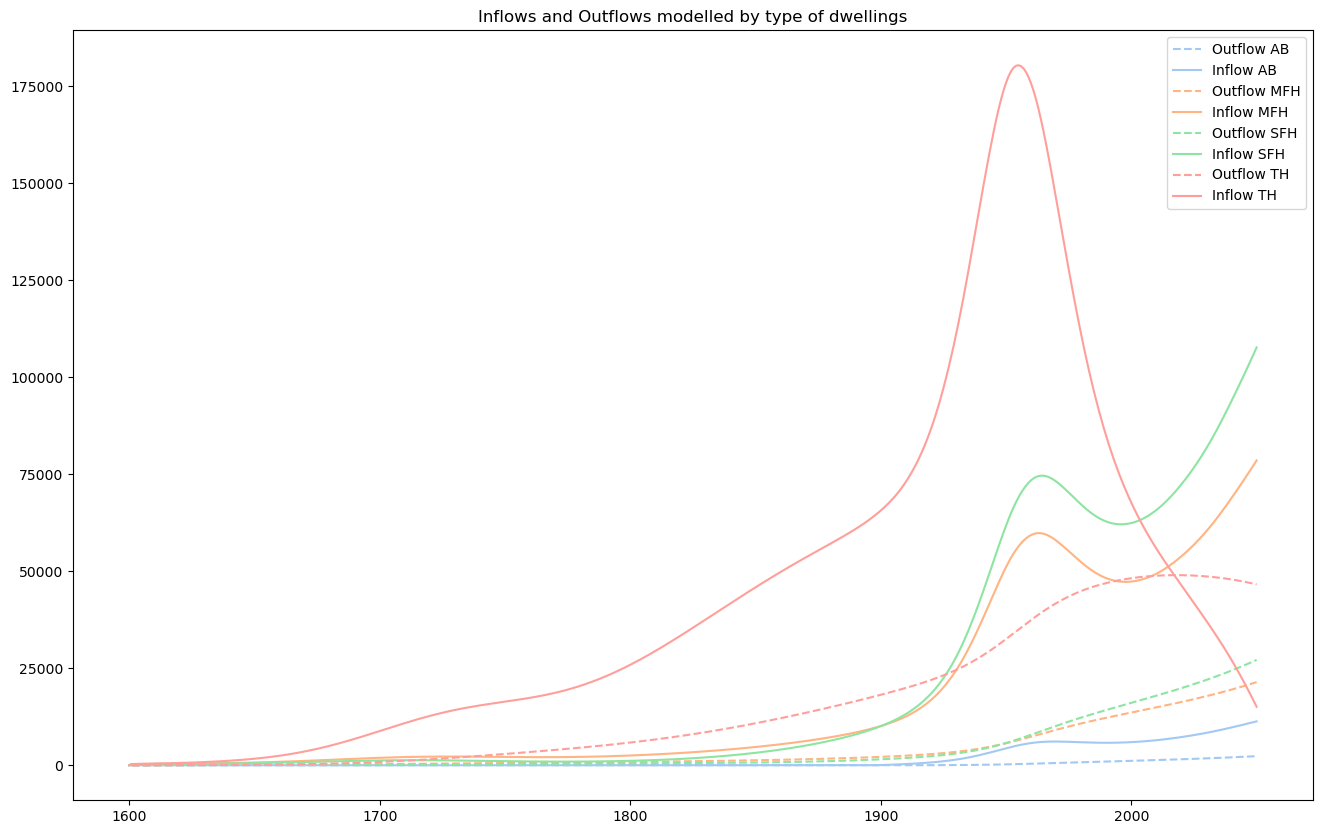

In [81]:
plt.figure(figsize=(16,10))
colors = sns.color_palette('pastel')[0:4]
plt.plot(DSM_AB_model['Outflow'],color=colors[0],linestyle='dashed', label='Outflow AB')
plt.plot(DSM_AB_model['Inflow'], color=colors[0], label='Inflow AB')
plt.plot(DSM_MFH_model['Outflow'],color=colors[1],linestyle='dashed', label='Outflow MFH')
plt.plot(DSM_MFH_model['Inflow'], color=colors[1], label='Inflow MFH')
plt.plot(DSM_SFH_model['Outflow'],color=colors[2],linestyle='dashed', label='Outflow SFH')
plt.plot(DSM_SFH_model['Inflow'], color=colors[2], label='Inflow SFH')
plt.plot(DSM_TH_model['Outflow'],color=colors[3],linestyle='dashed', label='Outflow TH')
plt.plot(DSM_TH_model['Inflow'], color=colors[3], label='Inflow TH')
plt.title('Inflows and Outflows modelled by type of dwellings')
plt.legend()
plt.show()

In [83]:
DSM_AB_model['Stock'] = DSM_AB_model['Stock change'].cumsum()
DSM_MFH_model['Stock'] = DSM_MFH_model['Stock change'].cumsum()
DSM_SFH_model['Stock'] = DSM_SFH_model['Stock change'].cumsum()
DSM_TH_model['Stock'] = DSM_TH_model['Stock change'].cumsum()

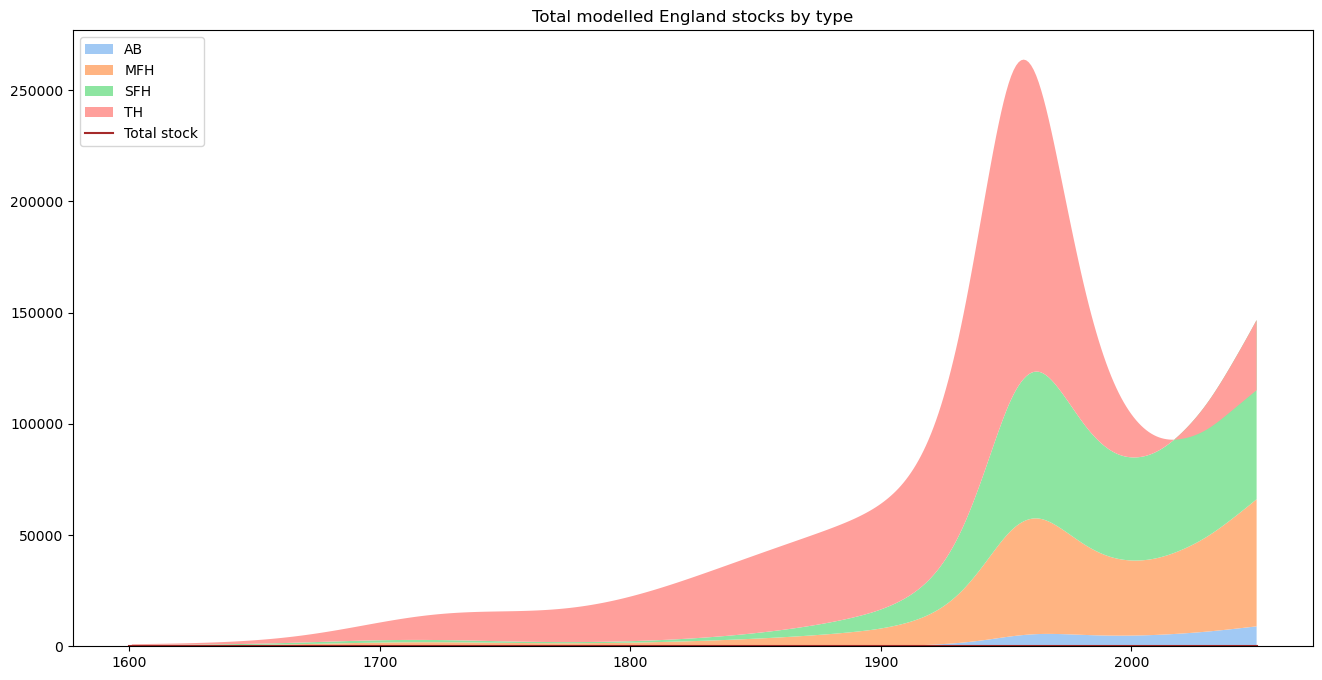

In [91]:
stock_change_by_types = [DSM_AB_model['Stock change'].to_list(),DSM_MFH_model['Stock change'].to_list(),DSM_SFH_model['Stock change'].to_list(),DSM_TH_model['Stock change'].to_list()]
colors = sns.color_palette('pastel')[0:5]

plt.figure(figsize=(16,8))
plt.stackplot(DSM.index,stock_change_by_types, labels=TYP, colors=colors)
plt.plot(DSM_model['Stock change'],label='Total stock',color='brown')
plt.legend(loc='upper left')
plt.title('Total modelled England stocks by type')
#plt.savefig("Output/Stocks-by-type-shares-1600-2050.png",dpi=300,bbox_inches='tight')
plt.show()

# Validation

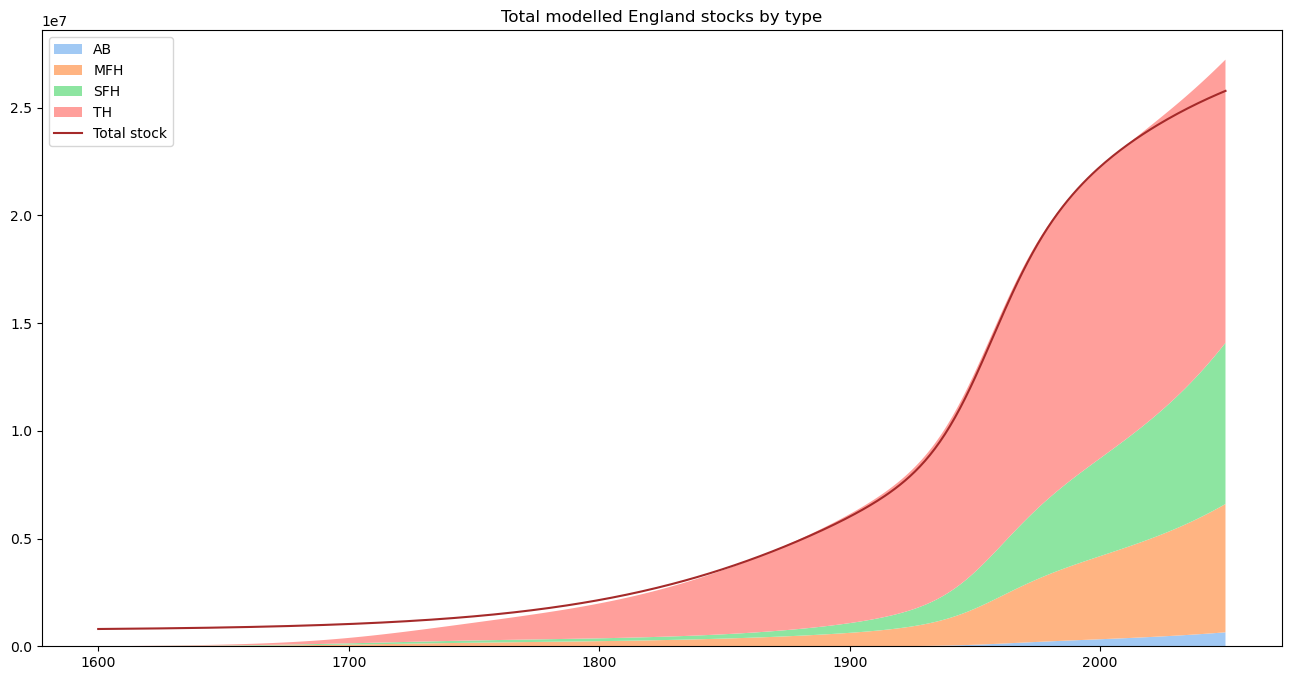

In [87]:
stock_by_types = [DSM_AB_model['Stock'].to_list(),DSM_MFH_model['Stock'].to_list(),DSM_SFH_model['Stock'].to_list(),DSM_TH_model['Stock'].to_list()]
colors = sns.color_palette('pastel')[0:5]

plt.figure(figsize=(16,8))
plt.stackplot(DSM.index,stock_by_types, labels=TYP, colors=colors)
plt.plot(DSM_model['Stock'],label='Total stock',color='brown')
plt.legend(loc='upper left')
plt.title('Total modelled England stocks by type')
plt.savefig("Output/Stocks-by-type-shares-1600-2050.png",dpi=300,bbox_inches='tight')
plt.show()

# Validation (outdated)

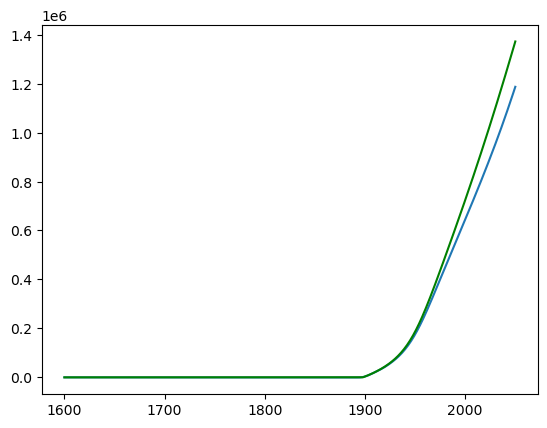

In [241]:
plt.plot(stock_AB.sum(axis=1))
plt.plot(DSM_AB_model['Stock'], color='green')
plt.show()

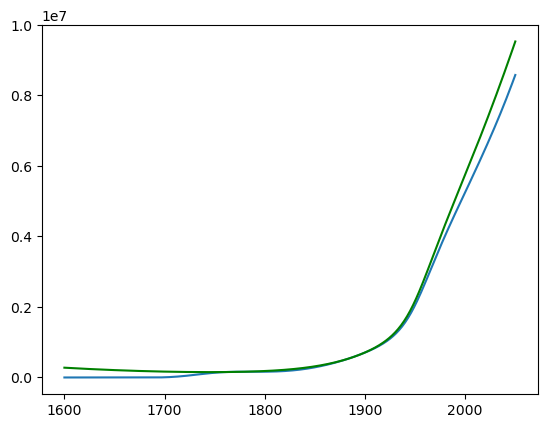

In [242]:
plt.plot(stock_MFH.sum(axis=1))
plt.plot(DSM_MFH_model['Stock'],color='green')
plt.show()

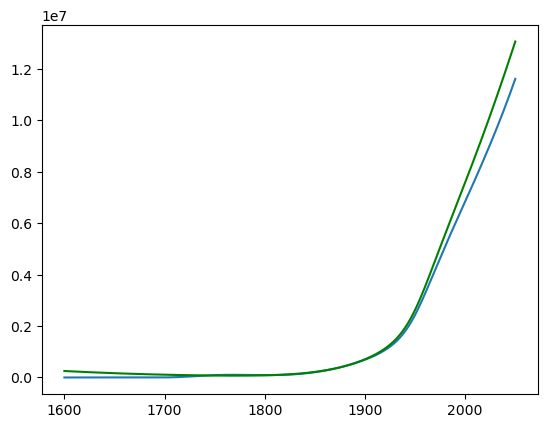

In [243]:
plt.plot(stock_SFH.sum(axis=1))
plt.plot(DSM_SFH_model['Stock'],color='green')
plt.show()

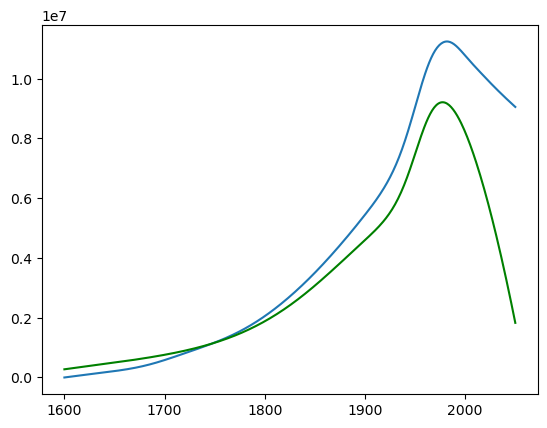

In [240]:
plt.plot(stock_TH.sum(axis=1))
plt.plot(DSM_TH_model['Stock'],color='green')
plt.show()

In [247]:
print(stock_AB.sum(axis=1)[2021]+stock_MFH.sum(axis=1)[2021]+stock_SFH.sum(axis=1)[2021]+stock_TH.sum(axis=1)[2021])
print(DSM_AB_model.loc[2021,'Stock']+DSM_MFH_model.loc[2021,'Stock']+DSM_SFH_model.loc[2021,'Stock']+DSM_TH_model.loc[2021,'Stock'])

26108212.933607936
24066550.607921984


# Exportation

In [88]:
stock_AB.to_csv('Model/stock_AB.csv',index_label='Time ↓ \ Cohort →')
stock_MFH.to_csv('Model/stock_MFH.csv', index_label='Time ↓ \ Cohort →')
stock_SFH.to_csv('Model/stock_SFH.csv', index_label='Time ↓ \ Cohort →')
stock_TH.to_csv('Model/stock_TH.csv', index_label='Time ↓ \ Cohort →')

In [90]:
DSM_AB_model.to_csv('Model/DSM_model_AB.csv')
DSM_MFH_model.to_csv('Model/DSM_model_MFH.csv')
DSM_SFH_model.to_csv('Model/DSM_model_SFH.csv')
DSM_TH_model.to_csv('Model/DSM_model_TH.csv')